In [153]:
#!pip install kagglehub[pandas-datasets]


In [154]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the path to the file you'd like to load
file_path1 = "Customer_comment.csv"
file_path2 = "Passanger_booking_data.csv"
file_path3 = "Survey data_Inflight Satisfaction Score.csv"

# Load the latest version
# cc is for Customer_comment
cc = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "manishkumar7432698/airline-passangers-booking-data",
  file_path1,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# pbd is for passanger booking data
pbd = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "manishkumar7432698/airline-passangers-booking-data",
  file_path2,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# sds is for survay data score
sds = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "manishkumar7432698/airline-passangers-booking-data",
  file_path3,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


/tmp/ipython-input-2704400007.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  cc = kagglehub.load_dataset(


Using Colab cache for faster access to the 'airline-passangers-booking-data' dataset.


/tmp/ipython-input-2704400007.py:23: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  pbd = kagglehub.load_dataset(


Using Colab cache for faster access to the 'airline-passangers-booking-data' dataset.


/tmp/ipython-input-2704400007.py:34: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  sds = kagglehub.load_dataset(


Using Colab cache for faster access to the 'airline-passangers-booking-data' dataset.


In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
# asr is for Airline Scrapped Review
# this file is should be uploaded as it is deleted at the end session
asr = pd.read_csv('/content/AirlineScrappedReview_Cleaned.csv')
asr.head()

,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,End_Location,Layover_Route,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address
0,Paige Boet,June 2023,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,London,NaN,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
1,S Layne,March 2023,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,Amman,NaN,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,..."
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,Bodrum,NaN,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye"
3,Joel Burman,June 2023,Amman to London,4,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Amman,London,NaN,31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
4,R Vines,NaN,London City to Ibiza,7,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Family Leisure,Business Class,London City,Ibiza,NaN,42.953765,-81.229153,"London (city), Ontario, N6C 0A7, Canada",38.974390,1.419746,"Eivissa, Illes Balears, España"


In [157]:
sds2 = sds
pbd2 = pbd
cc2 = cc

# **anaylizing and cleaning Passenger Booking Data**

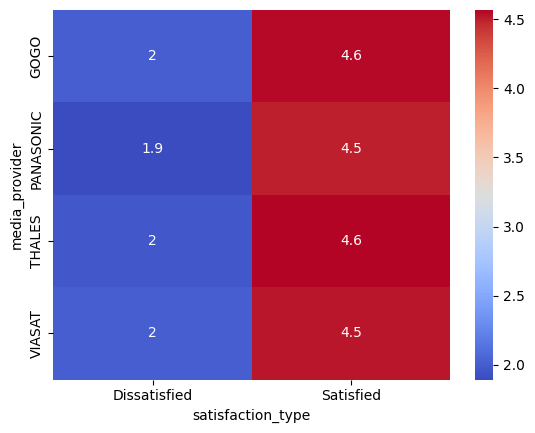

In [158]:
#before plotting, converting score to numeric of sds2
sds2['score'] = pd.to_numeric(sds2['score'], errors='coerce')
pivot = pd.pivot_table(sds2, index="media_provider", columns="satisfaction_type", values="score")
sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.show()

In [159]:
# The Data doesn't show much correlation to media provider

In [160]:
# fill in null scores with median
sds2['score'] = sds2['score'].fillna(sds2['score'].median())

In [161]:
print(list(sds2.columns))

['flight_number', 'origin_station_code', 'destination_station_code', 'record_locator', 'scheduled_departure_date', 'question_text', 'score', 'satisfaction_type', 'driver_sub_group1', 'driver_sub_group2', 'arrival_delay_minutes', 'arrival_delay_group', 'cabin_code_desc', 'cabin_name', 'entity', 'number_of_legs', 'seat_factor_band', 'loyalty_program_level', 'generation', 'fleet_type_description', 'fleet_usage', 'equipment_type_code', 'ua_uax', 'actual_flown_miles', 'haul_type', 'departure_gate', 'arrival_gate', 'international_domestic_indicator', 'response_group', 'media_provider', 'hub_spoke']


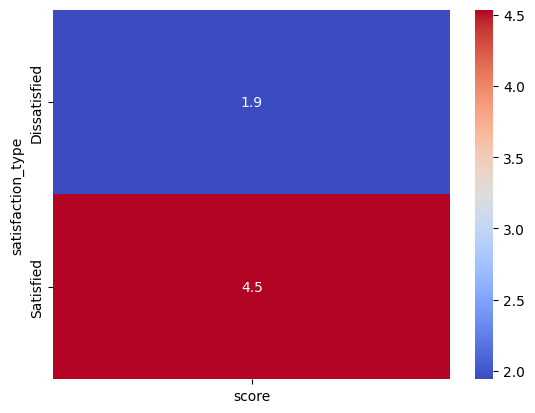

In [162]:
pivot = pd.pivot_table(
    sds2,
    index="satisfaction_type",
   # columns="Class",
    values="score",
    aggfunc="mean"  # or whatever aggregation you want
)

sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.show()


In [163]:
sds2.isnull().sum

<bound method DataFrame.sum of        flight_number  origin_station_code  destination_station_code  \
0              False                False                     False   
1              False                False                     False   
2              False                False                     False   
3              False                False                     False   
4              False                False                     False   
...              ...                  ...                       ...   
47069          False                False                     False   
47070          False                False                     False   
47071          False                False                     False   
47072          False                False                     False   
47073          False                False                     False   

       record_locator  scheduled_departure_date  question_text  score  \
0               False                     False          False  False   
1               False                     False          False  False   
2               False                     False          False  False   
3               False                     False          False  False   
4               False                     False          False  False   
...               ...                       ...            ...    ...   
47069           False                     False          False  False   
47070           False                     False          False  False   
47071           False                     False          False  False   
47072           False                     False          False  False   
47073           False                     False          False  False   

       satisfaction_type  driver_sub_group1  driver_sub_group2  ...  \
0                  False              False              False  ...   
1                  False              False              False  ...   
2                  False              False              False  ...   
3                  False              False              False  ...   
4                  False              False              False  ...   
...                  ...                ...                ...  ...   
47069              False              False              False  ...   
47070              False              False              False  ...   
47071              False              False              False  ...   
47072               True              False              False  ...   
47073               True              False              False  ...   

       equipment_type_code  ua_uax  actual_flown_miles  haul_type  \
0                    False   False               False      False   
1                    False   False               False      False   
2                    False   False               False      False   
3                    False   False               False      False   
4                    False   False               False      False   
...                    ...     ...                 ...        ...   
47069                False   False               False      False   
47070                False   False               False      False   
47071                False   False               False      False   
47072                False   False               False      False   
47073                False   False               False      False   

       departure_gate  arrival_gate  international_domestic_indicator  \
0               False         False                             False   
1               False         False                             False   
2               False         False                             False   
3               False         False                             False   
4               False         False                             False   
...               ...           ...                               ...   
47069           False         False           

In [164]:
sds2.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [165]:
pbd.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


## **The data illustrates that there are no null values in the Passenger Booking data set**

In [166]:
pbd.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


## **Transforming Text data to Numericals**

In [167]:
pbd['sales_channel'].value_counts()

,count
sales_channel,
Internet,44383
Mobile,5619


In [168]:
pbd['trip_type'].value_counts()

,count
trip_type,
RoundTrip,49498
OneWay,387
CircleTrip,117


In [169]:
pbd['sales_channel'] = pbd['sales_channel'].map({'Internet' : 0, 'Mobile' : 1})

In [170]:
pbd = pd.get_dummies(pbd, columns=['trip_type'], drop_first=True)

In [171]:
pbd.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_OneWay,trip_type_RoundTrip
0,1,0,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1,False,True
1,2,0,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,False,True
2,1,0,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,False,True
3,2,0,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,False,True
4,1,0,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,False,True


# **anaylizing and cleaning Customer Comment data set**

In [172]:
cc.head()

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
0,0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...
1,1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic
2,2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack
3,3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...
4,4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal


In [173]:
cc.columns

Index(['Unnamed: 0', 'flight_number', 'origin_station_code',
       'destination_station_code', 'scheduled_departure_date',
       'arrival_delay_group', 'departure_delay_group', 'entity',
       'verbatim_text', 'seat_factor_band', 'ques_verbatim_text',
       'loyalty_program_level', 'fleet_type_description', 'fleet_usage',
       'response_group', 'sentiments', 'transformed_text'],
      dtype='object')

In [174]:
#drop unlabeld block
cc = cc.drop(['Unnamed: 0'], axis=1)

In [175]:
cc.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...
1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic
2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack
3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...
4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal


In [176]:
cc.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
scheduled_departure_date,0
arrival_delay_group,0
departure_delay_group,0
entity,0
verbatim_text,0
seat_factor_band,0
ques_verbatim_text,0


In [177]:
import missingno as msno
msno.matrix(cc)

<Axes: >

In [178]:
# Getting the missing Loyalty program percentage
loyalty_programm_percent = (cc['loyalty_program_level'].isnull().sum() / len(cc)) * 100

In [179]:
print(loyalty_programm_percent)

26.570458404074703


In [180]:
# The loyalty_programm missing value are approximately 27 percent, which is not much
# but is it a varaible that would affect the learning ?

In [181]:
# same thing for the transform text, but the text is not a numerical value

In [182]:
cc['transformed_text'].value_counts()

,count
transformed_text,
none,97
good,69
thank,41
na,30
noth,27
...,...
stale,1
overnight oat recip busi stuff chia seed banana coconut chocol chip work well togeth quit tast harmoni,1
would like ask second time longer flight,1


## **Transforming Text Data to Numerals**

In [183]:
cc['fleet_usage'].value_counts()

,count
fleet_usage,
Mainline,7985
Express,1439


In [184]:
cc['fleet_usage'] = cc['fleet_usage'].map({'Mainline' : 1, 'Express' : 0})

In [185]:
cc['sentiments'].value_counts()

,count
sentiments,
Neutral,9307
Negative,117


In [186]:
cc['sentiments'] = cc['sentiments'].map({'Neutral' : 1, 'Negative' : 0})

In [187]:
cc['response_group'].value_counts()

,count
response_group,
member,6905
non-member,2518
NBK,1


In [188]:
cc = pd.get_dummies(cc, columns=['response_group'], drop_first=True)

In [189]:
cc['arrival_delay_group'].value_counts()

,count
arrival_delay_group,
Early & Ontime,6811
Delayed,2613


In [190]:
cc['arrival_delay_group'] = cc['arrival_delay_group'].map({'Early & Ontime' : 1, 'Delayed ' : 0})

In [191]:
cc['seat_factor_band'].value_counts()

,count
seat_factor_band,
90+,6302
80+,1639
70+,786
0 to 70,697


In [192]:
cc = pd.get_dummies(cc, columns=['seat_factor_band'], drop_first=True)

In [193]:
cc.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,sentiments,transformed_text,response_group_member,response_group_non-member,seat_factor_band_70+,seat_factor_band_80+,seat_factor_band_90+
0,950,LHX,SFX,2022-09-01,1.0,Delayed,Atlantic,There was no salad dressing. The staff informe...,Is there anything else you'd like to share abo...,non-elite,B777-200,1,1,salad dress staff inform flight receiv salad d...,True,False,False,False,False
1,950,LHX,SFX,2022-09-01,1.0,Delayed,Atlantic,Not a choice.,Is there anything else you'd like to share abo...,NaN,B777-200,1,1,choic,False,True,False,False,False
2,1876,FLX,EWX,2022-09-01,1.0,Early & Ontime,Domestic,More variety and bigger snacks.,Is there anything else you'd like to share abo...,non-elite,A320-200,1,1,varieti bigger snack,True,False,False,False,True
3,5469,SFX,SEX,2022-09-01,1.0,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,Is there anything else you'd like to share abo...,premier gold,ERJ-175,0,1,serv pretzel cooki first class extrem disappoi...,True,False,False,False,True
4,281,DEX,ANX,2022-09-01,1.0,Early & Ontime,Domestic,More inflight selections to purchase for full ...,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,1,1,inflight select purchas full meal,True,False,False,False,False


In [194]:
cc['departure_delay_group'].value_counts()

,count
departure_delay_group,
Early & Ontime,6241
Delayed,3183


In [195]:
cc['departure_delay_group'] = cc['departure_delay_group'].map({'Early & Ontime' : 1, 'Delayed ' : 0})

In [196]:
cc.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,sentiments,transformed_text,response_group_member,response_group_non-member,seat_factor_band_70+,seat_factor_band_80+,seat_factor_band_90+
0,950,LHX,SFX,2022-09-01,1.0,NaN,Atlantic,There was no salad dressing. The staff informe...,Is there anything else you'd like to share abo...,non-elite,B777-200,1,1,salad dress staff inform flight receiv salad d...,True,False,False,False,False
1,950,LHX,SFX,2022-09-01,1.0,NaN,Atlantic,Not a choice.,Is there anything else you'd like to share abo...,NaN,B777-200,1,1,choic,False,True,False,False,False
2,1876,FLX,EWX,2022-09-01,1.0,1.0,Domestic,More variety and bigger snacks.,Is there anything else you'd like to share abo...,non-elite,A320-200,1,1,varieti bigger snack,True,False,False,False,True
3,5469,SFX,SEX,2022-09-01,1.0,1.0,Domestic,Serving pretzels and cookies in first class wa...,Is there anything else you'd like to share abo...,premier gold,ERJ-175,0,1,serv pretzel cooki first class extrem disappoi...,True,False,False,False,True
4,281,DEX,ANX,2022-09-01,1.0,1.0,Domestic,More inflight selections to purchase for full ...,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,1,1,inflight select purchas full meal,True,False,False,False,False


In [197]:
cc['entity'].value_counts()

,count
entity,
Domestic,6593
Atlantic,1887
Latin,678
Pacific,266


In [198]:
cc = pd.get_dummies(cc, columns=['entity'], drop_first=True)

In [199]:
cc.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,verbatim_text,ques_verbatim_text,loyalty_program_level,fleet_type_description,...,sentiments,transformed_text,response_group_member,response_group_non-member,seat_factor_band_70+,seat_factor_band_80+,seat_factor_band_90+,entity_Domestic,entity_Latin,entity_Pacific
0,950,LHX,SFX,2022-09-01,1.0,NaN,There was no salad dressing. The staff informe...,Is there anything else you'd like to share abo...,non-elite,B777-200,...,1,salad dress staff inform flight receiv salad d...,True,False,False,False,False,False,False,False
1,950,LHX,SFX,2022-09-01,1.0,NaN,Not a choice.,Is there anything else you'd like to share abo...,NaN,B777-200,...,1,choic,False,True,False,False,False,False,False,False
2,1876,FLX,EWX,2022-09-01,1.0,1.0,More variety and bigger snacks.,Is there anything else you'd like to share abo...,non-elite,A320-200,...,1,varieti bigger snack,True,False,False,False,True,True,False,False
3,5469,SFX,SEX,2022-09-01,1.0,1.0,Serving pretzels and cookies in first class wa...,Is there anything else you'd like to share abo...,premier gold,ERJ-175,...,1,serv pretzel cooki first class extrem disappoi...,True,False,False,False,True,True,False,False
4,281,DEX,ANX,2022-09-01,1.0,1.0,More inflight selections to purchase for full ...,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,...,1,inflight select purchas full meal,True,False,False,False,False,True,False,False


In [200]:
cc['departure_delay_group'].value_counts()

,count
departure_delay_group,
1.0,6241


In [201]:
#Grouping all non-'1.0' as 0.0
cc['departure_delay_group'] = cc['departure_delay_group'].apply(lambda x: 0.0 if x != 1.0 else x)

In [202]:
cc.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,verbatim_text,ques_verbatim_text,loyalty_program_level,fleet_type_description,...,sentiments,transformed_text,response_group_member,response_group_non-member,seat_factor_band_70+,seat_factor_band_80+,seat_factor_band_90+,entity_Domestic,entity_Latin,entity_Pacific
0,950,LHX,SFX,2022-09-01,1.0,0.0,There was no salad dressing. The staff informe...,Is there anything else you'd like to share abo...,non-elite,B777-200,...,1,salad dress staff inform flight receiv salad d...,True,False,False,False,False,False,False,False
1,950,LHX,SFX,2022-09-01,1.0,0.0,Not a choice.,Is there anything else you'd like to share abo...,NaN,B777-200,...,1,choic,False,True,False,False,False,False,False,False
2,1876,FLX,EWX,2022-09-01,1.0,1.0,More variety and bigger snacks.,Is there anything else you'd like to share abo...,non-elite,A320-200,...,1,varieti bigger snack,True,False,False,False,True,True,False,False
3,5469,SFX,SEX,2022-09-01,1.0,1.0,Serving pretzels and cookies in first class wa...,Is there anything else you'd like to share abo...,premier gold,ERJ-175,...,1,serv pretzel cooki first class extrem disappoi...,True,False,False,False,True,True,False,False
4,281,DEX,ANX,2022-09-01,1.0,1.0,More inflight selections to purchase for full ...,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,...,1,inflight select purchas full meal,True,False,False,False,False,True,False,False


In [203]:
cc.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
scheduled_departure_date,0
arrival_delay_group,2613
departure_delay_group,0
verbatim_text,0
ques_verbatim_text,0
loyalty_program_level,2504
fleet_type_description,0


In [204]:
cc['arrival_delay_group'].value_counts()

,count
arrival_delay_group,
1.0,6811


In [205]:
#Grouping all non-'1.0' as 0.0
cc['arrival_delay_group'] = cc['arrival_delay_group'].apply(lambda x: 0.0 if x != 1.0 else x)

In [206]:
#fill in null comments with "No Comment"
cc['transformed_text'] = cc['transformed_text'].fillna("No Comment")

In [207]:
cc['loyalty_program_level'].value_counts()

,count
loyalty_program_level,
non-elite,4128
premier silver,874
premier 1k,722
premier gold,604
premier platinum,451
global services,140
NBK,1


In [208]:
cc['loyalty_program_level'] = cc['loyalty_program_level'].fillna('non-elite')

In [209]:
cc.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
scheduled_departure_date,0
arrival_delay_group,0
departure_delay_group,0
verbatim_text,0
ques_verbatim_text,0
loyalty_program_level,0
fleet_type_description,0


# **Analyzing and Cleaning Survay data score data set**

In [210]:
sds.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


## **Cleaning Null Values**

In [211]:
sds.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
record_locator,0
scheduled_departure_date,0
question_text,0
score,0
satisfaction_type,12111
driver_sub_group1,0
driver_sub_group2,0


In [212]:
len(sds)

47074

In [213]:
cabin_name = sds['cabin_name'].isnull().sum()
cabin_name_percent = (cabin_name / len(sds)) * 100

In [214]:
satisfaction_type = sds['satisfaction_type'].isnull().sum()
satisfaction_type_percent = (satisfaction_type / len(sds)) * 100

In [215]:
sds_loyalty_program_level = sds['loyalty_program_level'].isnull().sum()
sds_loyalty_program_level_percent = (sds_loyalty_program_level / len(sds)) * 100

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

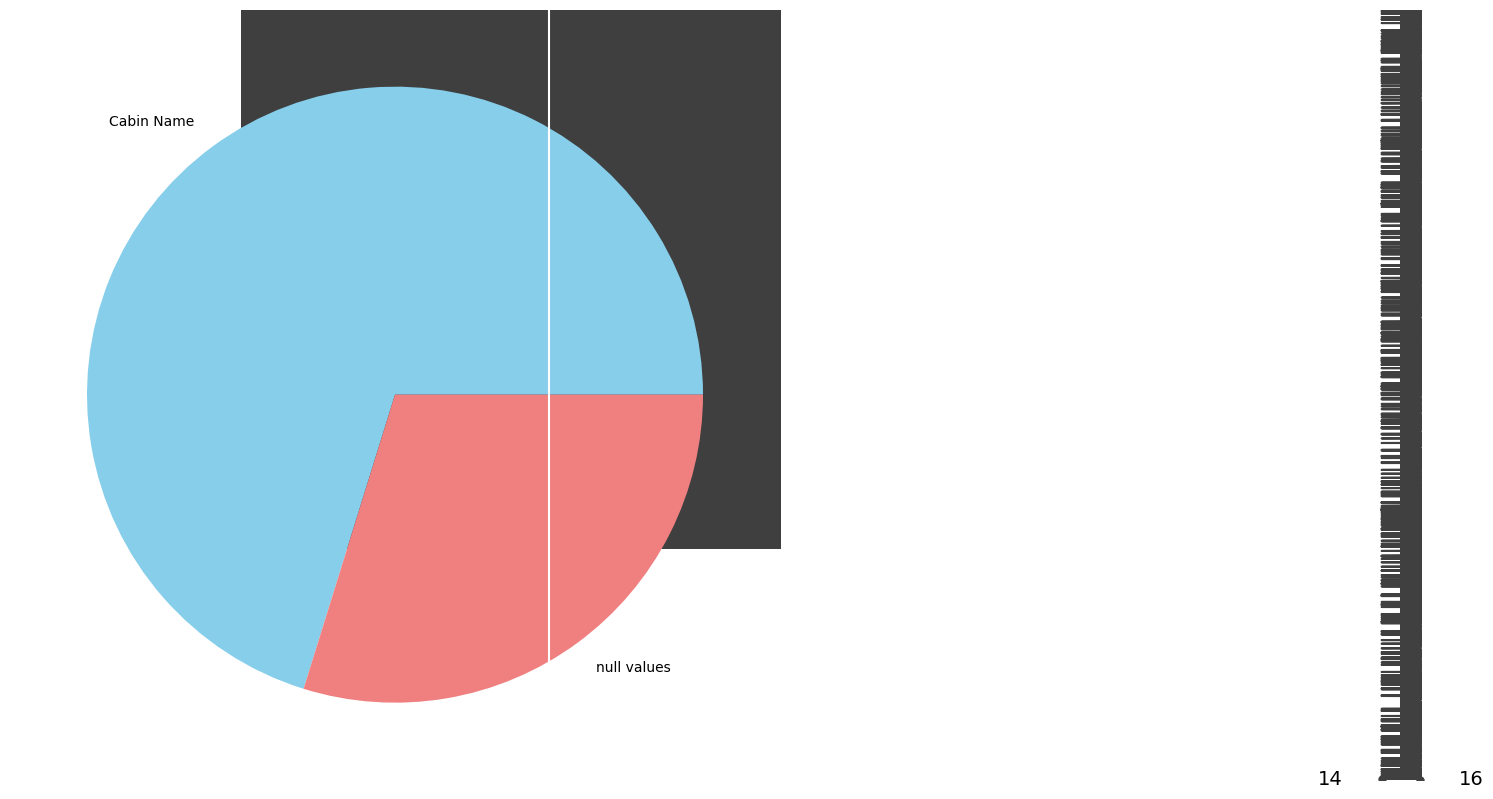

In [217]:
plt.pie([len(sds), cabin_name], labels=['Cabin Name', 'null values'],colors=['skyblue', 'lightcoral'])
plt.show()

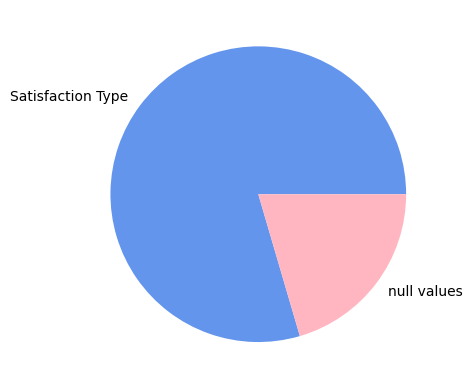

In [218]:
plt.pie([len(sds), satisfaction_type], labels=['Satisfaction Type', 'null values'], colors=['cornflowerblue', 'lightpink'])
plt.show()

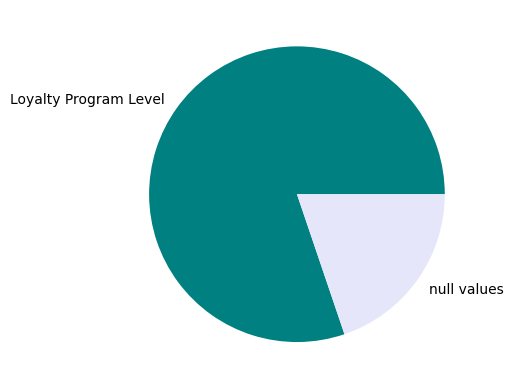

In [219]:
plt.pie([len(sds), sds_loyalty_program_level], labels=['Loyalty Program Level', 'null values'], colors=['teal', 'lavender'])
plt.show()

In [220]:
sds['loyalty_program_level'].value_counts()

,count
loyalty_program_level,
non-elite,19331
premier silver,4857
premier 1k,4334
premier gold,3362
premier platinum,2637
global services,934
NBK,3


In [221]:
#fill in with the feature with most count
sds['loyalty_program_level'] = sds['loyalty_program_level'].fillna('non-elite')

In [222]:
sds['cabin_name'].value_counts()

,count
cabin_name,
Economy,18438
Economy Plus,8656


In [223]:
#fill in the gaps in cabin_name
sds['cabin_name'] = sds['cabin_name'].fillna('Economy')

In [224]:
sds['satisfaction_type'].value_counts()

,count
satisfaction_type,
Dissatisfied,22353
Satisfied,12610


In [225]:
#new category for the satisfaction_type, neither satisfied nor dissatisfied
sds['satisfaction_type'] = sds['satisfaction_type'].fillna('neither satisfied nor dissatisfied')

In [226]:
sds.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
record_locator,0
scheduled_departure_date,0
question_text,0
score,0
satisfaction_type,0
driver_sub_group1,0
driver_sub_group2,0


In [227]:
sds['arrival_gate'].value_counts()

,count
arrival_gate,
HOLD,965
B55,480
A8,443
C5,435
C3,434
...,...
A3E,1
-2-,1
163,1


In [228]:
sds.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [229]:
sds.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
record_locator,0
scheduled_departure_date,0
question_text,0
score,0
satisfaction_type,0
driver_sub_group1,0
driver_sub_group2,0


In [230]:
#fill in with HOLD
sds['arrival_gate'] = sds['arrival_gate'].fillna('HOLD')

In [231]:
sds.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
record_locator,0
scheduled_departure_date,0
question_text,0
score,0
satisfaction_type,0
driver_sub_group1,0
driver_sub_group2,0


In [232]:
sds['departure_gate'].value_counts()

,count
departure_gate,
A8,589
3,469
2,450
4,405
B8,367
...,...
78,1
E84,1
S5,1


In [233]:
sds['departure_gate'] = sds['departure_gate'].fillna('UNKNOWN')

In [234]:
sds['media_provider'].value_counts()

,count
media_provider,
PANASONIC,24979
THALES,12765
GOGO,3907
VIASAT,3884


In [235]:
#What is the better option to add panasonic or unknowen ?
sds['media_provider'] = sds['media_provider'].fillna('Panasonic')

In [236]:
# select entity and international_domestic_indicator where entity is null
sds.loc[sds['entity'].isnull(), ['entity', 'international_domestic_indicator']]

,entity,international_domestic_indicator
39948,NaN,International
39949,NaN,International
39950,NaN,International


In [237]:
# Since "international_domestic_indicator" where entity is null, therefore fill it in with Atlantic
sds['entity'] = sds['entity'].fillna('Atlantic')

In [238]:
#encoding entity
sds = pd.get_dummies(sds, columns=['entity'], drop_first=True)

In [239]:
# encode satisfaction type
sds = pd.get_dummies(sds, columns=['satisfaction_type'])

In [240]:
sds['driver_sub_group1'].value_counts()

,count
driver_sub_group1,
food & beverage,47074


In [241]:
sds['driver_sub_group2'].value_counts()

,count
driver_sub_group2,
food and beverage satisfaction,34963
comp,12111


In [242]:
#encode these columns
sds = pd.get_dummies(sds, columns=['haul_type', 'international_domestic_indicator', 'response_group', 'hub_spoke', 'media_provider', 'driver_sub_group1', 'driver_sub_group2'])

In [243]:
#encode these columns
sds = pd.get_dummies(sds, columns=['cabin_name', 'arrival_delay_group'], drop_first=True)

In [244]:
sds.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
record_locator,0
scheduled_departure_date,0
question_text,0
score,0
arrival_delay_minutes,0
cabin_code_desc,0
number_of_legs,0


In [245]:
sds.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,arrival_delay_minutes,cabin_code_desc,number_of_legs,...,media_provider_GOGO,media_provider_PANASONIC,media_provider_Panasonic,media_provider_THALES,media_provider_VIASAT,driver_sub_group1_food & beverage,driver_sub_group2_comp,driver_sub_group2_food and beverage satisfaction,cabin_name_Economy Plus,arrival_delay_group_Early & Ontime
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2.0,-24,Economy,2,...,False,False,True,False,False,True,False,True,False,True
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5.0,10,Business,2,...,True,False,False,False,False,True,False,True,False,False
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5.0,-8,Business,2,...,True,False,False,False,False,True,False,True,False,True
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3.0,-11,Economy,3,...,False,False,True,False,False,True,False,True,False,True
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5.0,18,Business,2,...,False,True,False,False,False,True,False,True,False,False


In [246]:
cc.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,verbatim_text,ques_verbatim_text,loyalty_program_level,fleet_type_description,...,sentiments,transformed_text,response_group_member,response_group_non-member,seat_factor_band_70+,seat_factor_band_80+,seat_factor_band_90+,entity_Domestic,entity_Latin,entity_Pacific
0,950,LHX,SFX,2022-09-01,1.0,0.0,There was no salad dressing. The staff informe...,Is there anything else you'd like to share abo...,non-elite,B777-200,...,1,salad dress staff inform flight receiv salad d...,True,False,False,False,False,False,False,False
1,950,LHX,SFX,2022-09-01,1.0,0.0,Not a choice.,Is there anything else you'd like to share abo...,non-elite,B777-200,...,1,choic,False,True,False,False,False,False,False,False
2,1876,FLX,EWX,2022-09-01,1.0,1.0,More variety and bigger snacks.,Is there anything else you'd like to share abo...,non-elite,A320-200,...,1,varieti bigger snack,True,False,False,False,True,True,False,False
3,5469,SFX,SEX,2022-09-01,1.0,1.0,Serving pretzels and cookies in first class wa...,Is there anything else you'd like to share abo...,premier gold,ERJ-175,...,1,serv pretzel cooki first class extrem disappoi...,True,False,False,False,True,True,False,False
4,281,DEX,ANX,2022-09-01,1.0,1.0,More inflight selections to purchase for full ...,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,...,1,inflight select purchas full meal,True,False,False,False,False,True,False,False


In [247]:
pbd.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_OneWay,trip_type_RoundTrip
0,1,0,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1,False,True
1,2,0,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,False,True
2,1,0,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,False,True
3,2,0,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,False,True
4,1,0,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,False,True


In [248]:
# select from cc and sds where cc.flight_number is equal to sds.flight_number ,if a flight number doesn't exist in one
# of either add it too
#cc_sds = pd.merge(cc, sds, on='flight_number', how='inner')

In [249]:
#cc_sds.head()

In [250]:
sds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   flight_number                                         47074 non-null  int64  
 1   origin_station_code                                   47074 non-null  object 
 2   destination_station_code                              47074 non-null  object 
 3   record_locator                                        47074 non-null  object 
 4   scheduled_departure_date                              47074 non-null  object 
 5   question_text                                         47074 non-null  object 
 6   score                                                 47074 non-null  float64
 7   arrival_delay_minutes                                 47074 non-null  int64  
 8   cabin_code_desc                                       47

In [251]:
sds.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
record_locator,0
scheduled_departure_date,0
question_text,0
score,0
arrival_delay_minutes,0
cabin_code_desc,0
number_of_legs,0


In [252]:
sds['score'].value_counts()

,count
score,
3.0,18501
2.0,8250
1.0,7713
5.0,6733
4.0,5877


In [253]:
# Convert 'score' to numeric, coercing errors to handle non-numeric entries
sds['score'] = pd.to_numeric(sds['score'], errors='coerce')

# Fill in null values using the median of the numeric 'score' column
sds['score'] = sds['score'].fillna(sds['score'].median())

In [254]:
# searching for correlation between satisfaction type and {cabin_name, media_provider, driver_sub_group1, driver_sub_group2, score, response_group}
# using the most suitable plot in sds
import seaborn as sns
import matplotlib.pyplot as plt




In [255]:
sds.columns

Index(['flight_number', 'origin_station_code', 'destination_station_code',
       'record_locator', 'scheduled_departure_date', 'question_text', 'score',
       'arrival_delay_minutes', 'cabin_code_desc', 'number_of_legs',
       'seat_factor_band', 'loyalty_program_level', 'generation',
       'fleet_type_description', 'fleet_usage', 'equipment_type_code',
       'ua_uax', 'actual_flown_miles', 'departure_gate', 'arrival_gate',
       'entity_Domestic', 'entity_Latin', 'entity_Pacific',
       'satisfaction_type_Dissatisfied', 'satisfaction_type_Satisfied',
       'satisfaction_type_neither satisfied nor dissatisfied',
       'haul_type_Long', 'haul_type_Medium', 'haul_type_Short',
       'international_domestic_indicator_Domestic',
       'international_domestic_indicator_International', 'response_group_NBK',
       'response_group_member', 'response_group_non-member',
       'hub_spoke_hub departure', 'hub_spoke_spoke departure',
       'media_provider_GOGO', 'media_provider_PANASON

In [256]:
sds.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
record_locator,0
scheduled_departure_date,0
question_text,0
score,0
arrival_delay_minutes,0
cabin_code_desc,0
number_of_legs,0


In [257]:
sds

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,arrival_delay_minutes,cabin_code_desc,number_of_legs,...,media_provider_GOGO,media_provider_PANASONIC,media_provider_Panasonic,media_provider_THALES,media_provider_VIASAT,driver_sub_group1_food & beverage,driver_sub_group2_comp,driver_sub_group2_food and beverage satisfaction,cabin_name_Economy Plus,arrival_delay_group_Early & Ontime
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2.0,-24,Economy,2,...,False,False,True,False,False,True,False,True,False,True
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5.0,10,Business,2,...,True,False,False,False,False,True,False,True,False,False
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5.0,-8,Business,2,...,True,False,False,False,False,True,False,True,False,True
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3.0,-11,Economy,3,...,False,False,True,False,False,True,False,True,False,True
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5.0,18,Business,2,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47069,2,SFX,SIX,IPXXM3,9/30/2022,How satisfied were you with the food & beverag...,4.0,-16,Economy,1,...,False,True,False,False,False,True,False,True,False,True
47070,2,SFX,SIX,O5XXK4,9/30/2022,How satisfied were you with the food & beverag...,4.0,-16,Economy,1,...,False,True,False,False,False,True,False,True,False,True
47071,3,SIX,SFX,G8XX3W,9/30/2022,How satisfied were you with the food & beverag...,1.0,18,Business,1,...,False,True,False,False,False,True,False,True,False,False
47072,3,SIX,SFX,G8XX3W,9/30/2022,What item did you choose?,3.0,18,Business,1,...,False,True,False,False,False,True,True,False,False,False


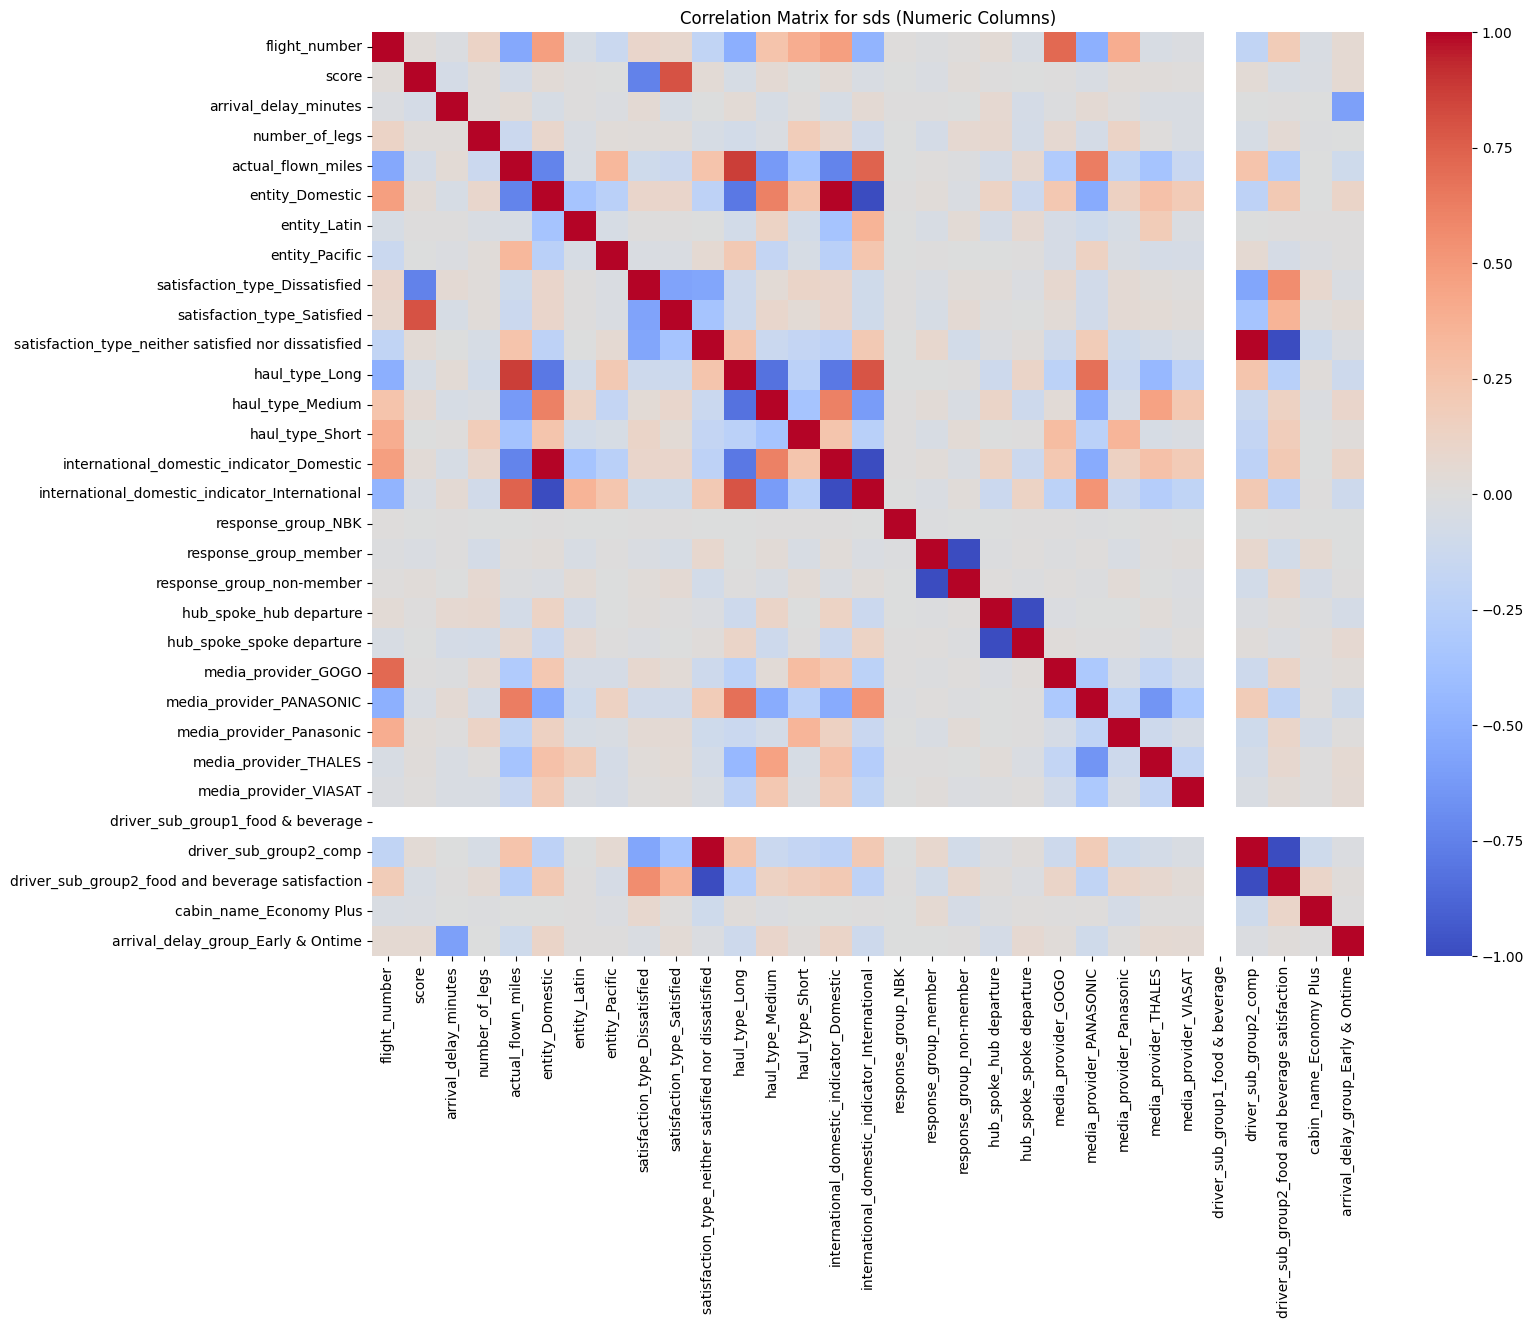

In [258]:
# Drop non-numeric columns from sds for correlation analysis
sds_numeric = sds.select_dtypes(include=['number', 'bool'])

# Calculate the correlation matrix
correlation_matrix_sds = sds_numeric.corr()

# Display the correlation matrix (or a heatmap if preferred)
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_sds, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for sds (Numeric Columns)')
plt.show()

Processing pbd DataFrame:


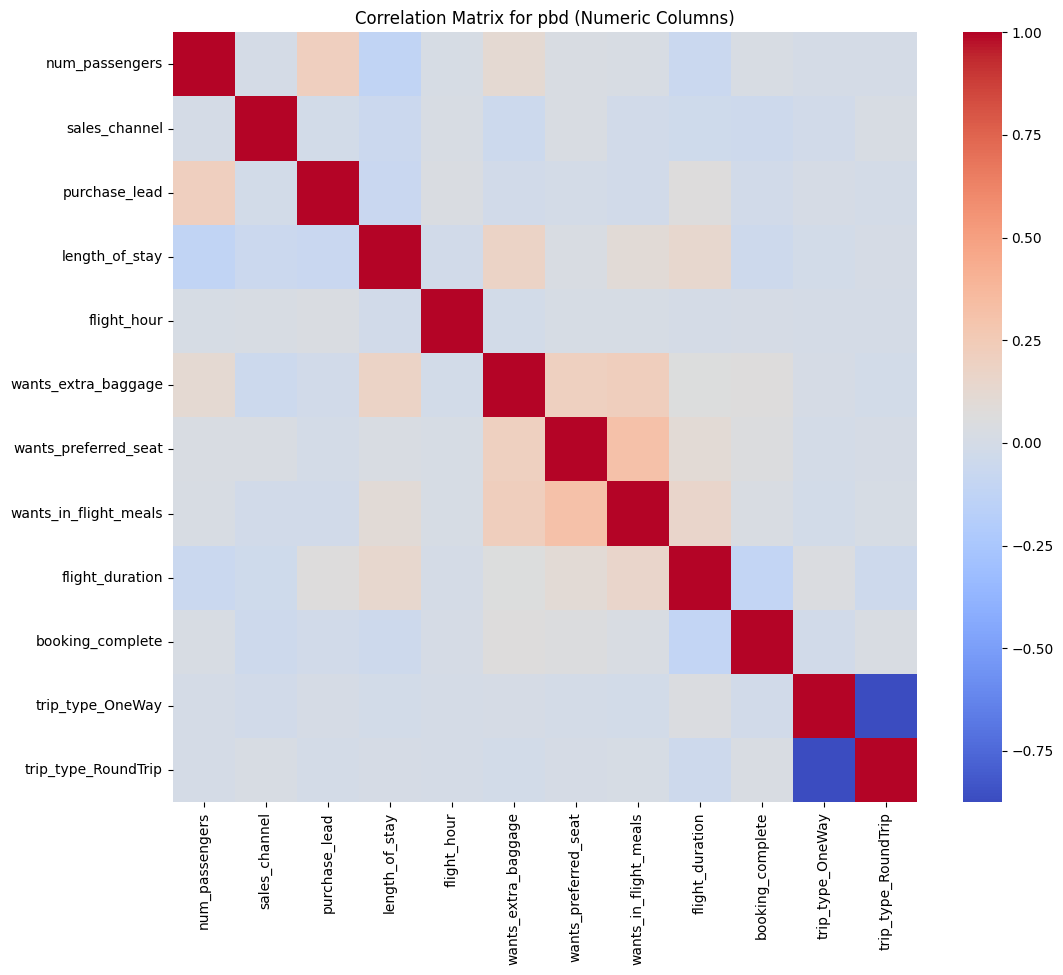


Processing cc DataFrame:


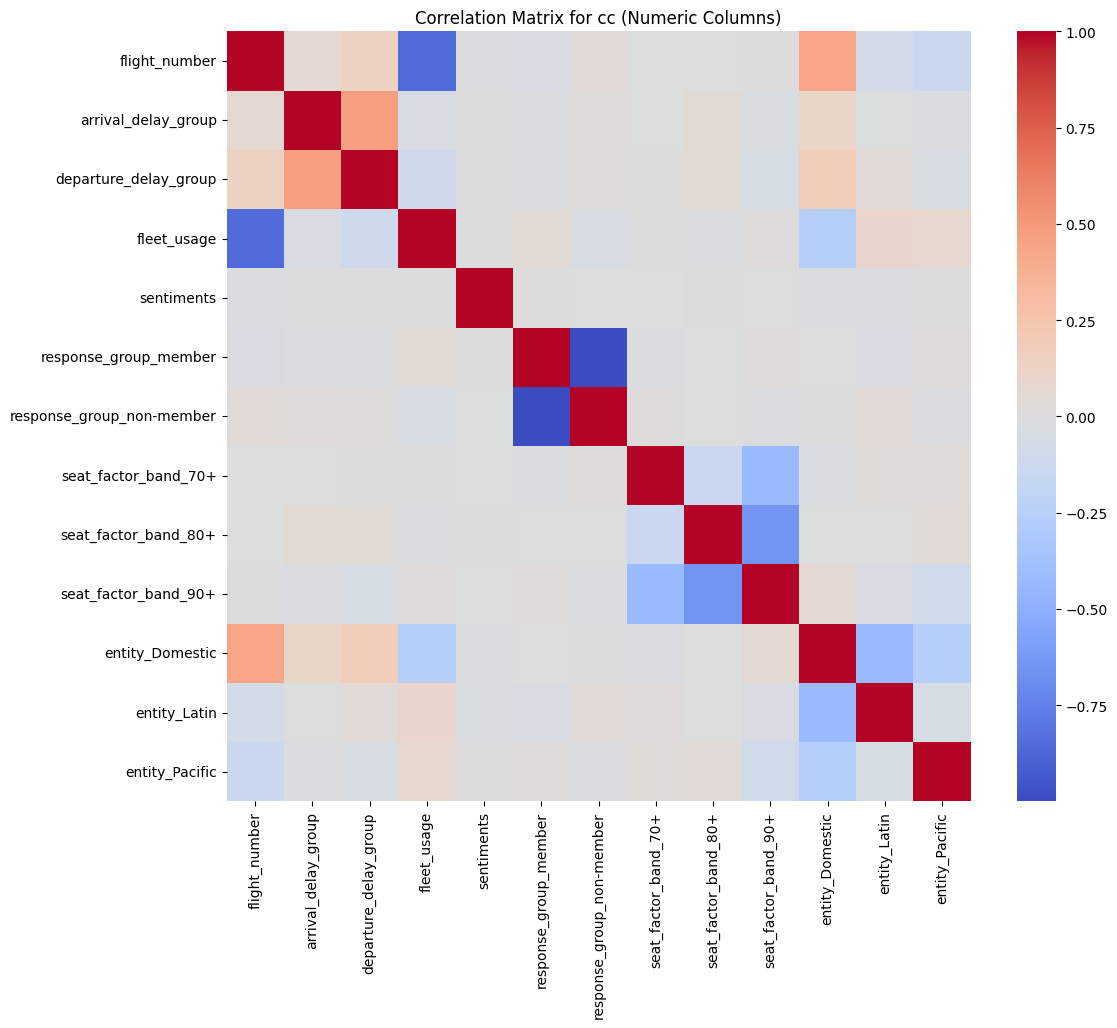

In [259]:
# Process pbd DataFrame
print("Processing pbd DataFrame:")
pbd_numeric = pbd.select_dtypes(include=['number', 'bool'])
correlation_matrix_pbd = pbd_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_pbd, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for pbd (Numeric Columns)')
plt.show()

# Process cc DataFrame
print("\nProcessing cc DataFrame:")
cc_numeric = cc.select_dtypes(include=['number', 'bool'])
correlation_matrix_cc = cc_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cc, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for cc (Numeric Columns)')
plt.show()

In [260]:
# Identify features with high correlation from the correlation matrices
# For sds, we can look at correlations with 'score' and satisfaction types
sds_correlated_features = correlation_matrix_sds.abs().unstack().sort_values(ascending=False)
sds_highly_correlated_with_score = sds_correlated_features.filter(like='score').drop('score').head(10)
sds_highly_correlated_with_satisfaction = sds_correlated_features.filter(like='satisfaction_type').drop(['satisfaction_type_Dissatisfied', 'satisfaction_type_Satisfied', 'satisfaction_type_neither satisfied nor dissatisfied']).head(10)

# For pbd, we can look at correlations with 'booking_complete'
pbd_correlated_features = correlation_matrix_pbd.abs().unstack().sort_values(ascending=False)
pbd_highly_correlated_with_booking = pbd_correlated_features.filter(like='booking_complete').drop('booking_complete').head(10)

# For cc, we can look at correlations with 'sentiments' or delay groups
cc_correlated_features = correlation_matrix_cc.abs().unstack().sort_values(ascending=False)
cc_highly_correlated_with_sentiments = cc_correlated_features.filter(like='sentiments').drop('sentiments').head(10)
cc_highly_correlated_with_arrival_delay = cc_correlated_features.filter(like='arrival_delay_group').drop('arrival_delay_group').head(10)
cc_highly_correlated_with_departure_delay = cc_correlated_features.filter(like='departure_delay_group').drop('departure_delay_group').head(10)


# Combine and list the most influential features
most_influential_features = [
    sds_highly_correlated_with_score.index.tolist(),
    sds_highly_correlated_with_satisfaction.index.tolist(),
    pbd_highly_correlated_with_booking.index.tolist(),
    cc_highly_correlated_with_sentiments.index.tolist(),
    cc_highly_correlated_with_arrival_delay.index.tolist(),
    cc_highly_correlated_with_departure_delay.index.tolist()
]

# Flatten the list and remove duplicates
import itertools
most_influential_features = list(set(list(itertools.chain(*most_influential_features))))

print("Most influential features across the datasets:")
print(most_influential_features)

Most influential features across the datasets:
[('num_passengers', 'booking_complete'), ('fleet_usage', 'sentiments'), ('driver_sub_group2_food and beverage satisfaction', 'satisfaction_type_Satisfied'), ('purchase_lead', 'booking_complete'), ('response_group_non-member', 'departure_delay_group'), ('length_of_stay', 'booking_complete'), ('flight_number', 'arrival_delay_group'), ('seat_factor_band_80+', 'departure_delay_group'), ('seat_factor_band_90+', 'arrival_delay_group'), ('haul_type_Long', 'score'), ('flight_duration', 'booking_complete'), ('driver_sub_group2_food and beverage satisfaction', 'satisfaction_type_Dissatisfied'), ('trip_type_OneWay', 'booking_complete'), ('entity_Pacific', 'departure_delay_group'), ('driver_sub_group2_food and beverage satisfaction', 'score'), ('score', 'satisfaction_type_Satisfied'), ('wants_extra_baggage', 'booking_complete'), ('flight_number', 'sentiments'), ('seat_factor_band_90+', 'sentiments'), ('response_group_member', 'departure_delay_group'),

/tmp/ipython-input-781185904.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sds_highly_correlated_with_score = sds_correlated_features.filter(like='score').drop('score').head(10)
/tmp/ipython-input-781185904.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sds_highly_correlated_with_satisfaction = sds_correlated_features.filter(like='satisfaction_type').drop(['satisfaction_type_Dissatisfied', 'satisfaction_type_Satisfied', 'satisfaction_type_neither satisfied nor dissatisfied']).head(10)
/tmp/ipython-input-781185904.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pbd_highly_correlated_with_booking = pbd_correlated_features.filter(like='booking_complete').drop('booking_complete').head(10)
/tmp/ipython-input-781185904.py:13: PerformanceWarning: dropping on a non-lexsorted multi-ind

In [261]:
most_influential_features

[('num_passengers', 'booking_complete'),
 ('fleet_usage', 'sentiments'),
 ('driver_sub_group2_food and beverage satisfaction',
  'satisfaction_type_Satisfied'),
 ('purchase_lead', 'booking_complete'),
 ('response_group_non-member', 'departure_delay_group'),
 ('length_of_stay', 'booking_complete'),
 ('flight_number', 'arrival_delay_group'),
 ('seat_factor_band_80+', 'departure_delay_group'),
 ('seat_factor_band_90+', 'arrival_delay_group'),
 ('haul_type_Long', 'score'),
 ('flight_duration', 'booking_complete'),
 ('driver_sub_group2_food and beverage satisfaction',
  'satisfaction_type_Dissatisfied'),
 ('trip_type_OneWay', 'booking_complete'),
 ('entity_Pacific', 'departure_delay_group'),
 ('driver_sub_group2_food and beverage satisfaction', 'score'),
 ('score', 'satisfaction_type_Satisfied'),
 ('wants_extra_baggage', 'booking_complete'),
 ('flight_number', 'sentiments'),
 ('seat_factor_band_90+', 'sentiments'),
 ('response_group_member', 'departure_delay_group'),
 ('entity_Domestic', 'a

In [262]:
# Identify features with high correlation from the correlation matrices
# For sds, we can look at correlations with 'score' and satisfaction types
sds_correlated_features = correlation_matrix_sds.abs().unstack().sort_values(ascending=False)
sds_highly_correlated_with_score = sds_correlated_features.filter(like='score').drop('score').head(10)
sds_highly_correlated_with_satisfaction = sds_correlated_features.filter(like='satisfaction_type').drop(['satisfaction_type_Dissatisfied', 'satisfaction_type_Satisfied', 'satisfaction_type_neither satisfied nor dissatisfied']).head(10)

/tmp/ipython-input-3686498409.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sds_highly_correlated_with_score = sds_correlated_features.filter(like='score').drop('score').head(10)
/tmp/ipython-input-3686498409.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sds_highly_correlated_with_satisfaction = sds_correlated_features.filter(like='satisfaction_type').drop(['satisfaction_type_Dissatisfied', 'satisfaction_type_Satisfied', 'satisfaction_type_neither satisfied nor dissatisfied']).head(10)


In [263]:
# For pbd, we can look at correlations with 'booking_complete'
pbd_correlated_features = correlation_matrix_pbd.abs().unstack().sort_values(ascending=False)
pbd_highly_correlated_with_booking = pbd_correlated_features.filter(like='booking_complete').drop('booking_complete').head(10)

/tmp/ipython-input-2566271596.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pbd_highly_correlated_with_booking = pbd_correlated_features.filter(like='booking_complete').drop('booking_complete').head(10)


In [264]:
# For cc, we can look at correlations with 'sentiments' or delay groups
cc_correlated_features = correlation_matrix_cc.abs().unstack().sort_values(ascending=False)
cc_highly_correlated_with_sentiments = cc_correlated_features.filter(like='sentiments').drop('sentiments').head(10)
cc_highly_correlated_with_arrival_delay = cc_correlated_features.filter(like='arrival_delay_group').drop('arrival_delay_group').head(10)
cc_highly_correlated_with_departure_delay = cc_correlated_features.filter(like='departure_delay_group').drop('departure_delay_group').head(10)


/tmp/ipython-input-3815031168.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cc_highly_correlated_with_sentiments = cc_correlated_features.filter(like='sentiments').drop('sentiments').head(10)
/tmp/ipython-input-3815031168.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cc_highly_correlated_with_arrival_delay = cc_correlated_features.filter(like='arrival_delay_group').drop('arrival_delay_group').head(10)
/tmp/ipython-input-3815031168.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cc_highly_correlated_with_departure_delay = cc_correlated_features.filter(like='departure_delay_group').drop('departure_delay_group').head(10)


In [265]:
# Combine and list the most influential features
most_influential_features = [
    sds_highly_correlated_with_score.index.tolist(),
    sds_highly_correlated_with_satisfaction.index.tolist(),
    pbd_highly_correlated_with_booking.index.tolist(),
    cc_highly_correlated_with_sentiments.index.tolist(),
    cc_highly_correlated_with_arrival_delay.index.tolist(),
    cc_highly_correlated_with_departure_delay.index.tolist()
]


In [266]:
# Flatten the list and remove duplicates, then extract just the feature names
import itertools
flattened_features = list(itertools.chain(*most_influential_features))
linear_features_array = list(set([feature for pair in flattened_features for feature in pair]))

print("Most influential features across the datasets (linear array):")
print(linear_features_array)

Most influential features across the datasets (linear array):
['response_group_non-member', 'seat_factor_band_80+', 'wants_preferred_seat', 'length_of_stay', 'purchase_lead', 'arrival_delay_group', 'flight_duration', 'trip_type_RoundTrip', 'seat_factor_band_70+', 'entity_Latin', 'entity_Pacific', 'driver_sub_group2_food and beverage satisfaction', 'wants_in_flight_meals', 'num_passengers', 'score', 'departure_delay_group', 'arrival_delay_group_Early & Ontime', 'satisfaction_type_neither satisfied nor dissatisfied', 'sales_channel', 'driver_sub_group2_comp', 'sentiments', 'booking_complete', 'trip_type_OneWay', 'arrival_delay_minutes', 'entity_Domestic', 'wants_extra_baggage', 'seat_factor_band_90+', 'response_group_member', 'satisfaction_type_Dissatisfied', 'haul_type_Medium', 'satisfaction_type_Satisfied', 'haul_type_Long', 'fleet_usage', 'flight_number', 'actual_flown_miles']


In [267]:
linear_features_array

['response_group_non-member',
 'seat_factor_band_80+',
 'wants_preferred_seat',
 'length_of_stay',
 'purchase_lead',
 'arrival_delay_group',
 'flight_duration',
 'trip_type_RoundTrip',
 'seat_factor_band_70+',
 'entity_Latin',
 'entity_Pacific',
 'driver_sub_group2_food and beverage satisfaction',
 'wants_in_flight_meals',
 'num_passengers',
 'score',
 'departure_delay_group',
 'arrival_delay_group_Early & Ontime',
 'satisfaction_type_neither satisfied nor dissatisfied',
 'sales_channel',
 'driver_sub_group2_comp',
 'sentiments',
 'booking_complete',
 'trip_type_OneWay',
 'arrival_delay_minutes',
 'entity_Domestic',
 'wants_extra_baggage',
 'seat_factor_band_90+',
 'response_group_member',
 'satisfaction_type_Dissatisfied',
 'haul_type_Medium',
 'satisfaction_type_Satisfied',
 'haul_type_Long',
 'fleet_usage',
 'flight_number',
 'actual_flown_miles']

# ***Machine Learning***

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [269]:
# Define the target variable (y) as the 'score' column from the sds dataset
y = sds['score']

# Define the features (X) using the influential features identified previously
# We need to make sure these features exist in the sds DataFrame
X_columns = [feature for feature in linear_features_array if feature in sds.columns and feature != 'score']
X = sds[X_columns]

# Display the shapes of X and y to confirm the split
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (47074, 17)
Shape of y (target): (47074,)


In [270]:
print("Handling missing values in X...")
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

for col in numeric_cols:
    X[col].fillna(X[col].median(), inplace=True)

for col in categorical_cols:
    X[col].fillna('Missing', inplace=True)

print("Encoding categorical features...")
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Shape of X before encoding: {X.shape}")
print(f"Shape of X after encoding: {X_encoded.shape}")

Handling missing values in X...
Encoding categorical features...
Shape of X before encoding: (47074, 17)
Shape of X after encoding: (47074, 17)


/tmp/ipython-input-2103009047.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
/tmp/ipython-input-2103009047.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].median(), inplace=True)
/tmp/ipython-input-2103009047.py:9: FutureWarning: A value is trying to be set on a copy of

In [271]:
X_encoded

,response_group_non-member,entity_Latin,entity_Pacific,driver_sub_group2_food and beverage satisfaction,arrival_delay_group_Early & Ontime,satisfaction_type_neither satisfied nor dissatisfied,driver_sub_group2_comp,arrival_delay_minutes,entity_Domestic,response_group_member,satisfaction_type_Dissatisfied,haul_type_Medium,satisfaction_type_Satisfied,haul_type_Long,flight_number,actual_flown_miles,fleet_usage_Mainline
0,True,False,False,True,True,False,False,-24,True,False,True,False,False,False,3802,67,False
1,False,False,False,True,False,False,False,10,True,True,False,False,True,False,4645,72,False
2,False,False,False,True,True,False,False,-8,True,True,False,False,True,False,5236,72,False
3,False,False,False,True,True,False,False,-11,True,True,True,False,False,False,4686,72,False
4,False,False,False,True,False,False,False,18,True,True,False,False,True,False,671,72,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47069,True,False,True,True,True,False,False,-16,False,False,False,False,True,True,2,8440,True
47070,False,False,True,True,True,False,False,-16,False,True,False,False,True,True,2,8440,True
47071,False,False,True,True,False,False,False,18,False,True,True,False,False,True,3,8440,True
47072,False,False,True,False,False,True,True,18,False,True,False,False,False,True,3,8440,True


In [272]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (37659, 17)
Shape of X_test: (9415, 17)
Shape of y_train: (37659,)
Shape of y_test: (9415,)


In [273]:
model_1 = LogisticRegression()

model_1.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [274]:
y_pred = model_1.predict(X_test)

# Accuracy works fine as-is
print("Accuracy:", accuracy_score(y_test, y_pred))

# Add average='weighted' (or 'macro') to these three:
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# These work fine as-is
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5573021773765268
Precision: 0.5891016667195028
Recall: 0.5573021773765268
F1 Score: 0.5594620524681545

Classification Report:
              precision    recall  f1-score   support

         1.0       0.33      0.40      0.36      1506
         2.0       0.38      0.48      0.43      1691
         3.0       0.85      0.68      0.76      3656
         4.0       0.45      0.22      0.29      1201
         5.0       0.54      0.79      0.64      1361

    accuracy                           0.56      9415
   macro avg       0.51      0.51      0.50      9415
weighted avg       0.59      0.56      0.56      9415


Confusion Matrix:
[[ 598  721  187    0    0]
 [ 652  814  225    0    0]
 [ 537  582 2491   46    0]
 [   0    0   13  263  925]
 [   0    0    4  276 1081]]


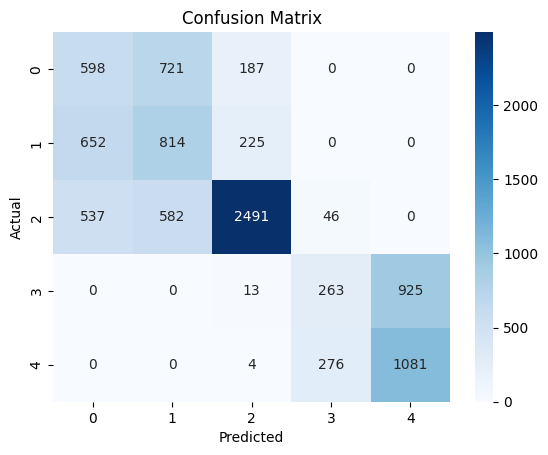

In [275]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [276]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.metrics import Precision, Recall


In [277]:
scaler = StandardScaler()

In [278]:
X_scaled = scaler.fit_transform(X_encoded)

In [279]:
i_train, i_test, j_train, j_test = train_test_split(X_scaled, y,
test_size=0.2, random_state=42)

In [280]:
print("Train data shape:",i_train.shape, "Train Label shape", i_train.shape)
print("Test data shape:",i_test.shape, "Test Label shape", i_test.shape)

Train data shape: (37659, 17) Train Label shape (37659, 17)
Test data shape: (9415, 17) Test Label shape (9415, 17)


In [281]:
model = Sequential([
Input(shape=(i_train.shape[1],)),
layers.Dense(16, activation='relu'),
layers.Dense(8, activation='relu'),
layers.Dense(1, activation='sigmoid') # binary classification
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

In [282]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy',
Precision(name='precision'),
Recall(name='recall')])

In [283]:
history = model.fit(i_train, j_train, epochs=20, validation_split=0.2,
verbose=1)

Epoch 1/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1563 - loss: -165.8989 - precision: 1.0000 - recall: 0.9287 - val_accuracy: 0.1610 - val_loss: -2886.7498 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1653 - loss: -5978.6660 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1610 - val_loss: -20842.8105 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1623 - loss: -29091.1543 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1610 - val_loss: -60979.0742 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1661 - loss: -74618.3906 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1610 - val_loss: -126693.0078 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1634 - loss: -147561.9375 - precision: 1.0000 - recall: 1

In [284]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3,
restore_best_weights=True)
history2 = model.fit(i_train, j_train,
epochs=50,
validation_split=0.2,
verbose=1,
callbacks=[early_stop])

Epoch 1/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1624 - loss: -7494912.0000 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1610 - val_loss: -8255901.5000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1667 - loss: -8457739.0000 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1610 - val_loss: -9346933.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1658 - loss: -9561116.0000 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1610 - val_loss: -10526920.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1674 - loss: -10678583.0000 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1610 - val_loss: -11801541.0000 - val_precision: 1.0000 - val_recall: 1.0000


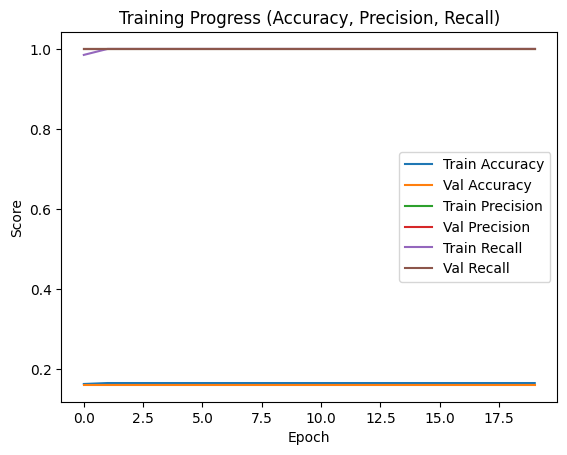

In [285]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Val Precision')
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Training Progress (Accuracy, Precision, Recall)')
plt.legend()
plt.show()

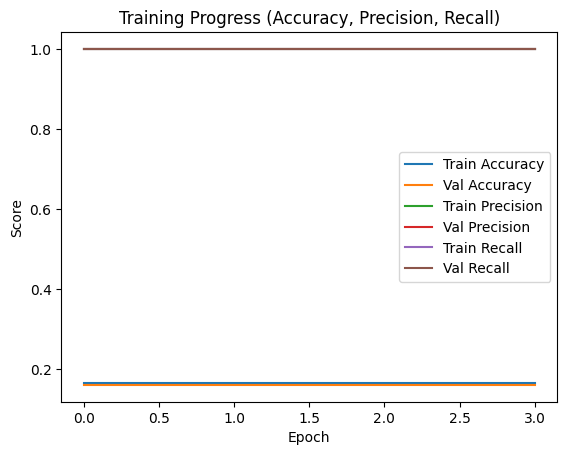

In [286]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.plot(history2.history['precision'], label='Train Precision')
plt.plot(history2.history['val_precision'], label='Val Precision')
plt.plot(history2.history['recall'], label='Train Recall')
plt.plot(history2.history['val_recall'], label='Val Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Training Progress (Accuracy, Precision, Recall)')
plt.legend()
plt.show()

In [287]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(i_test, j_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test Loss: -8252624.5
Test Accuracy: 0.15995751321315765
Test Precision: 1.0
Test Recall: 1.0


In [288]:
# 1. Ensure your numeric sds DataFrame and correlation matrix are calculated
sds_numeric = sds.select_dtypes(include=['number', 'bool'])
correlation_matrix_sds = sds_numeric.corr()

# 2. Get the features most correlated with 'score'
sds_correlated_features = correlation_matrix_sds.abs().unstack().sort_values(ascending=False)

# Get the top 10 features most correlated with 'score'
sds_highly_correlated_with_score = sds_correlated_features.filter(like='score').drop('score').head(10)

print("--- Top 10 features correlated with 'score' ---")
print(sds_highly_correlated_with_score)

# 3. Create the new linear_features_array
linear_features_array = sds_highly_correlated_with_score.index.get_level_values(0).tolist()

print("\n--- New 'linear_features_array' ---")
print(linear_features_array)

# --- END: New Simplified Feature Selection ---

--- Top 10 features correlated with 'score' ---
satisfaction_type_Satisfied                           score    0.797981
satisfaction_type_Dissatisfied                        score    0.746148
arrival_delay_minutes                                 score    0.069132
actual_flown_miles                                    score    0.062804
arrival_delay_group_Early & Ontime                    score    0.055509
haul_type_Medium                                      score    0.054119
haul_type_Long                                        score    0.053049
driver_sub_group2_food and beverage satisfaction      score    0.043954
driver_sub_group2_comp                                score    0.043954
satisfaction_type_neither satisfied nor dissatisfied  score    0.043954
dtype: float64

--- New 'linear_features_array' ---
['satisfaction_type_Satisfied', 'satisfaction_type_Dissatisfied', 'arrival_delay_minutes', 'actual_flown_miles', 'arrival_delay_group_Early & Ontime', 'haul_type_Medium', 'haul_typ

/tmp/ipython-input-299599481.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sds_highly_correlated_with_score = sds_correlated_features.filter(like='score').drop('score').head(10)


X_train shape: (37659, 17)
X_test shape: (9415, 17)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469 (1.83 KB)

 Trainable params: 469 (1.83 KB)

 Non-trainable params: 0 (0.00 B)


Starting Neural Network Training...
Epoch 1/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4840 - loss: 1.0838 - val_accuracy: 0.5815 - val_loss: 0.7040
Epoch 2/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5821 - loss: 0.7029 - val_accuracy: 0.5783 - val_loss: 0.6994
Epoch 3/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5809 - loss: 0.6999 - val_accuracy: 0.5890 - val_loss: 0.6965
Epoch 4/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5830 - loss: 0.6963 - val_accuracy: 0.5842 - val_loss: 0.6971
Epoch 5/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5869 - loss: 0.6952 - val_accuracy: 0.5826 - val_loss: 0.6969
Epoch 6/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5856 - loss: 0.6958 - val_accuracy: 0.5846 - val_loss: 0.6970
Epoch 7/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5828 - loss: 0.6984 - val_accuracy: 0.5856 - val_loss: 0.6966
Epoch 8/20
942/942 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5

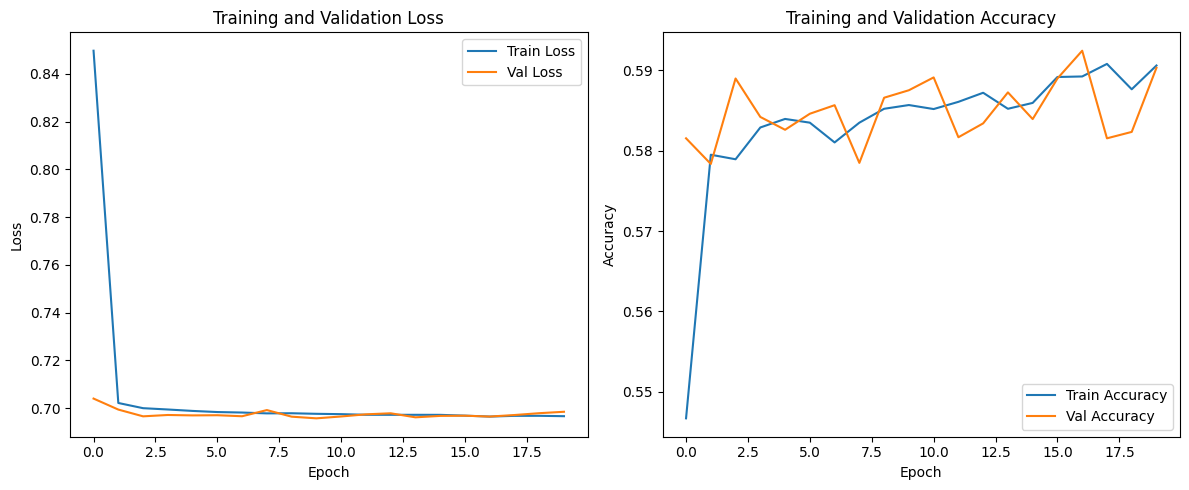


Evaluating final model on test set...
Test Loss: 0.7081
Test Accuracy: 0.5724
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report (Neural Network):
              precision    recall  f1-score   support

         0.0       0.36      0.51      0.42      1506
         1.0       0.38      0.50      0.43      1691
         2.0       0.97      0.66      0.79      3656
         3.0       0.50      0.26      0.34      1201
         4.0       0.54      0.77      0.63      1361

    accuracy                           0.57      9415
   macro avg       0.55      0.54      0.52      9415
weighted avg       0.64      0.57      0.59      9415


Confusion Matrix (Neural Network):


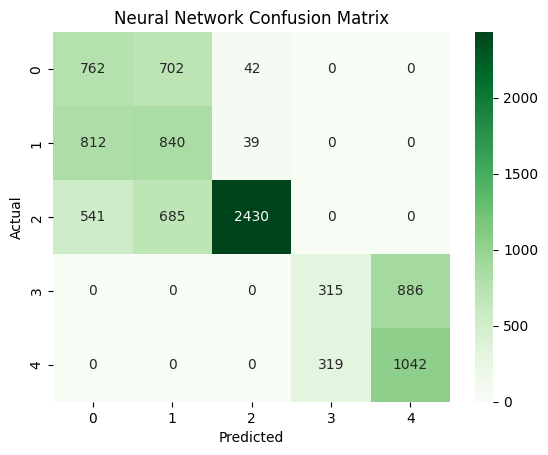

In [289]:
# --- FIX 1: Prepare Y Target for Keras ---
# Keras requires class labels to start at 0 (e.g., 0, 1, 2, 3, 4)
# Your 'score' column is [1, 2, 3, 4, 5]. We must subtract 1.
y_nn = y - 1

# --- FIX 2: Split Data *BEFORE* Scaling (Prevents Data Leakage) ---
# We use the X_encoded and new y_nn variables
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_nn, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# --- FIX 3: Scale Data *AFTER* Splitting ---
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the mean/std from the training data)
X_test_scaled = scaler.transform(X_test)


# --- FIX 4: Correct Model Architecture (Multiclass) ---
# The model must output 5 classes, not 1.
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),

    # CRITICAL FIX:
    # Use 5 units (one for each class: 0, 1, 2, 3, 4)
    # Use 'softmax' activation for multiclass classification
    layers.Dense(5, activation='softmax')
])

model.summary()


# --- FIX 5: Correct Model Compilation (Multiclass) ---
model.compile(optimizer='adam',

              # CRITICAL FIX:
              # Use 'sparse_categorical_crossentropy' because your
              # y labels are integers (0, 1, 2, 3, 4) and not one-hot encoded.
              # 'binary_crossentropy' was incorrect.
              loss='sparse_categorical_crossentropy',

              # We can only track 'accuracy' here.
              metrics=['accuracy'])


# --- FIX 6: Train the Model on the Correct Data ---
# Use the *scaled* training data and the 0-indexed y_train
print("\nStarting Neural Network Training...")
history = model.fit(X_train_scaled, y_train,
                    epochs=20,
                    validation_split=0.2, # Use part of training data for validation
                    verbose=1)
print("Training complete.")


# --- FIX 7: Correct Plotting ---
# Plot only the metrics that were compiled: 'loss' and 'accuracy'
print("\nPlotting model history...")
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# --- FIX 8: Evaluate the Final Model ---
# Evaluate the model on the *scaled* test set
print("\nEvaluating final model on test set...")
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# You can also generate a full classification report
y_pred_nn = model.predict(X_test_scaled)
y_pred_classes = y_pred_nn.argmax(axis=1) # Get the class index with the highest probability

print("\nClassification Report (Neural Network):")
# Note: y_test is already 0-indexed, so this report is correct
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix (Neural Network):")
cm_nn = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm_nn, annot=True, fmt="d", cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

In [290]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# 2. Use pd.get_dummies to create the encoder
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 3. Save the *columns* from the encoded data. This is your "encoder"
encoded_columns = X_encoded.columns

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_nn, test_size=0.2, random_state=42)

# 5. Create and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- (Now your model training code...) ---

# --- (Add this function *after* model training) ---

# Define score mapping for natural language
score_map = {0: "1 (Very Dissatisfied)",
             1: "2 (Dissatisfied)",
             2: "3 (Neutral)",
             3: "4 (Satisfied)",
             4: "5 (Very Satisfied)"}

def predict_satisfaction(raw_input_df):
    """
    Accepts a single-row DataFrame of raw input,
    pre-processes it, and returns a natural language prediction.
    """

    # 1. Make a copy to avoid changing original
    processed_df = raw_input_df.copy()

    # 2. Fill NaNs just like in training
    for col in numeric_cols:
        if col in processed_df.columns:
            processed_df[col].fillna(X[col].median(), inplace=True)
    for col in categorical_cols:
        if col in processed_df.columns:
            processed_df[col].fillna('Missing', inplace=True)

    # 3. Apply one-hot encoding
    processed_df = pd.get_dummies(processed_df, columns=categorical_cols, drop_first=True)

    # 4. Align columns with the training data
    # Reindex to add any missing dummy columns (with 0s)
    processed_df = processed_df.reindex(columns=encoded_columns, fill_value=0)

    # 5. Scale the data using the *fitted* scaler
    scaled_input = scaler.transform(processed_df)

    # 6. Make prediction
    prediction = model.predict(scaled_input)
    predicted_class = prediction.argmax(axis=1)[0]

    # 7. Return natural language output
    return score_map[predicted_class]

# --- Demonstrate the Inference Function ---
print("\n--- Inference Function Demonstration ---")

# Take one row from the *original* dataset (before cleaning)
example_input = sds[X_columns].iloc[[10]]

print(f"Raw Input:\n {example_input.to_dict()}")
prediction_text = predict_satisfaction(example_input)
print(f"\nPredicted Satisfaction: {prediction_text}")


--- Inference Function Demonstration ---
Raw Input:
 {'response_group_non-member': {10: True}, 'entity_Latin': {10: False}, 'entity_Pacific': {10: True}, 'driver_sub_group2_food and beverage satisfaction': {10: True}, 'arrival_delay_group_Early & Ontime': {10: True}, 'satisfaction_type_neither satisfied nor dissatisfied': {10: False}, 'driver_sub_group2_comp': {10: False}, 'arrival_delay_minutes': {10: -19}, 'entity_Domestic': {10: False}, 'response_group_member': {10: False}, 'satisfaction_type_Dissatisfied': {10: True}, 'haul_type_Medium': {10: False}, 'satisfaction_type_Satisfied': {10: False}, 'haul_type_Long': {10: False}, 'fleet_usage': {10: 'Mainline'}, 'flight_number': {10: 118}, 'actual_flown_miles': {10: 129}}


/tmp/ipython-input-2718557761.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df[col].fillna(X[col].median(), inplace=True)
/tmp/ipython-input-2718557761.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step

Predicted Satisfaction: 3 (Neutral)



Creating DeepExplainer... (This will be much faster)
Calculating SHAP values...


/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_12
Received: inputs=['Tensor(shape=(100, 17))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_12
Received: inputs=['Tensor(shape=(200, 17))']
  warnings.warn(msg)


SHAP values calculated.

Plotting Global Explanation (Feature Importance)...


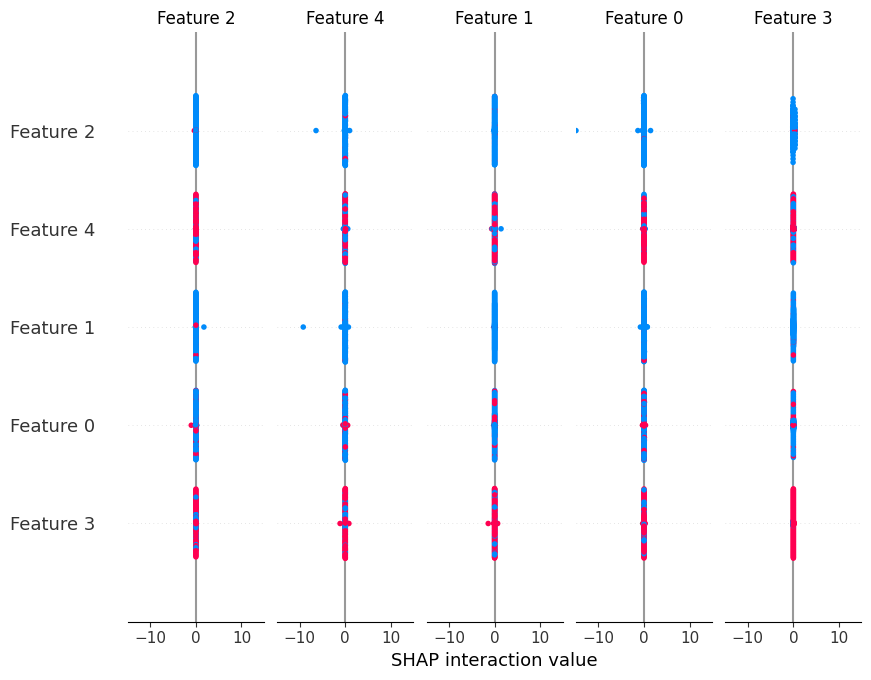


Plotting Local Explanation (for one prediction)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Model Prediction: 1 (Very Dissatisfied) (True Class: 2 (Dissatisfied))


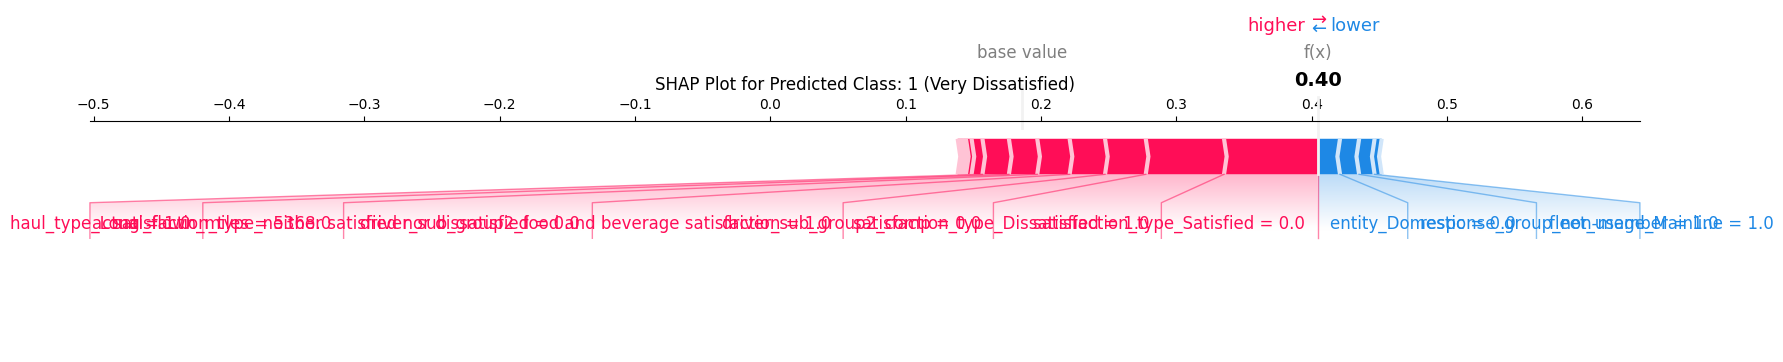

In [291]:
#!pip install shap
import shap
import numpy as np
# --- 1. Global Explanation (Feature Importance) ---

print("\nCreating DeepExplainer... (This will be much faster)")

# 1. Use a sample of the training data as the "background"
background = shap.sample(X_train_scaled, 100)

# 2. Create a DeepExplainer (the correct tool for Keras models)
explainer = shap.DeepExplainer(model, background)

# 3. Calculate SHAP values
print("Calculating SHAP values...")
# We use a sample of the test set for efficiency
shap_values = explainer.shap_values(X_test_scaled[:200])
print("SHAP values calculated.")

print("\nPlotting Global Explanation (Feature Importance)...")
# Note: We pass the *scaled* data for the summary plot, as that's what SHAP values were calculated on
shap.summary_plot(shap_values, X_test_scaled[:200], class_names=score_map.values())

# --- 2. Local Explanation (Single Prediction) ---

print("\nPlotting Local Explanation (for one prediction)...")

# Explain the 5th prediction in the test set
prediction_index = 5

# --- Get feature names and values for the plot ---
# We use the *unscaled* X_test for readable feature names and values
features_for_plot_series = X_test.iloc[prediction_index]
features_for_plot_values = features_for_plot_series.values
feature_names_list = features_for_plot_series.index.tolist()

# Get the model's prediction for this one row
prediction_array = model.predict(X_test_scaled[[prediction_index]])
predicted_class_index = int(prediction_array.argmax())
predicted_class_name = score_map[predicted_class_index]

# Get the true class for labeling
true_class_index = y_test.iloc[prediction_index]
true_class_name = score_map[true_class_index]

print(f"\nModel Prediction: {predicted_class_name} (True Class: {true_class_name})")

# --- CORRECTED INDEXING ---
# Get the base value for the *predicted* class (convert from Tensor to float)
base_value = explainer.expected_value[predicted_class_index].numpy()

# Get the shap values for *all features* for the *predicted class*
# Index as: [sample_index, all_features, class_index]
shap_val_for_sample = shap_values[prediction_index, :, predicted_class_index]

# --- Plot the force plot ---
shap.force_plot(base_value,
                shap_val_for_sample,
                features_for_plot_values, # Use unscaled values for readability
                feature_names=feature_names_list,
                matplotlib=True,
                show=False)
plt.title(f"SHAP Plot for Predicted Class: {predicted_class_name}")
plt.show()

In [292]:
# --- Block 1: Add Sentiment Analysis Column (Objective 2) ---
# NOTE: This block will fail until you upload 'AirlineScrappedReview_Cleaned.csv'
print("--- Starting Objective 2: Data-Engineering ---")

try:
    # Load the cleaned review file (assuming you have it in your Colab environment)
    # Make sure the file name is correct
    asr = pd.read_csv('AirlineScrappedReview_Cleaned.csv')
    print("Successfully loaded 'AirlineScrappedReview_Cleaned.csv'.")

    # Install vaderSentiment
    #!pip install vaderSentiment
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

    # Initialize the analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Create the new column
    # We need to fill NaNs in 'Review_content' to avoid errors
    asr['Review_content'] = asr['Review_content'].fillna('')
    asr['Sentiment_Analysis'] = asr['Review_content'].apply(lambda review: analyzer.polarity_scores(review)['compound'])

    print("Successfully added 'Sentiment_Analysis' column to asr DataFrame.")
    print(asr[['Review_content', 'Sentiment_Analysis']].head())

    # Save the new dataset (Deliverable 2)
    asr.to_csv("AirlineScrappedReview_with_Sentiment.csv", index=False)
    print("\nSaved new dataset (Deliverable 2) to 'AirlineScrappedReview_with_Sentiment.csv'")

except FileNotFoundError:
    print("\n--- ERROR ---")
    print("CRITICAL: 'AirlineScrappedReview_Cleaned.csv' not found.")
    print("Please upload this file to your Colab environment to proceed.")
except Exception as e:
    print(f"An error occurred in Block 1: {e}")

--- Starting Objective 2: Data-Engineering ---
Successfully loaded 'AirlineScrappedReview_Cleaned.csv'.
Successfully added 'Sentiment_Analysis' column to asr DataFrame.
                                      Review_content  Sentiment_Analysis
0  The airline lost my luggage and was absolutely...             -0.7990
1  We booked on the BA website, round trip flight...              0.0219
2  First time flying with BA business class, neve...             -0.7096
3  You can buy sandwiches and crisps but don't ex...             -0.5849
4  This is a two-for-one review covering economy ...              0.9789

Saved new dataset (Deliverable 2) to 'AirlineScrappedReview_with_Sentiment.csv'



--- Answering Data-Engineering Questions ---
Loaded Passanger_booking_data.csv for Q1 & Q2.

--- Q1: Top 10 Popular Flight Routes ---
route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
Name: count, dtype: int64


/tmp/ipython-input-3840437479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_routes.values, y=top_10_routes.index, palette='viridis')


Saved plot to 'top_10_routes.png'


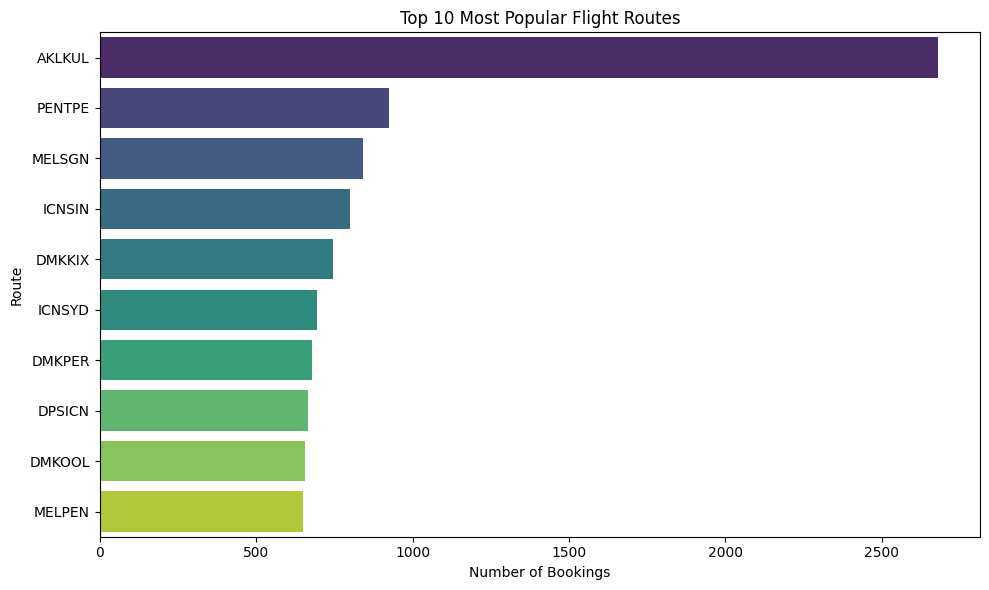


--- Q2: Distribution of Bookings by Flight Hour ---
Saved plot to 'booking_hour_distribution.png'


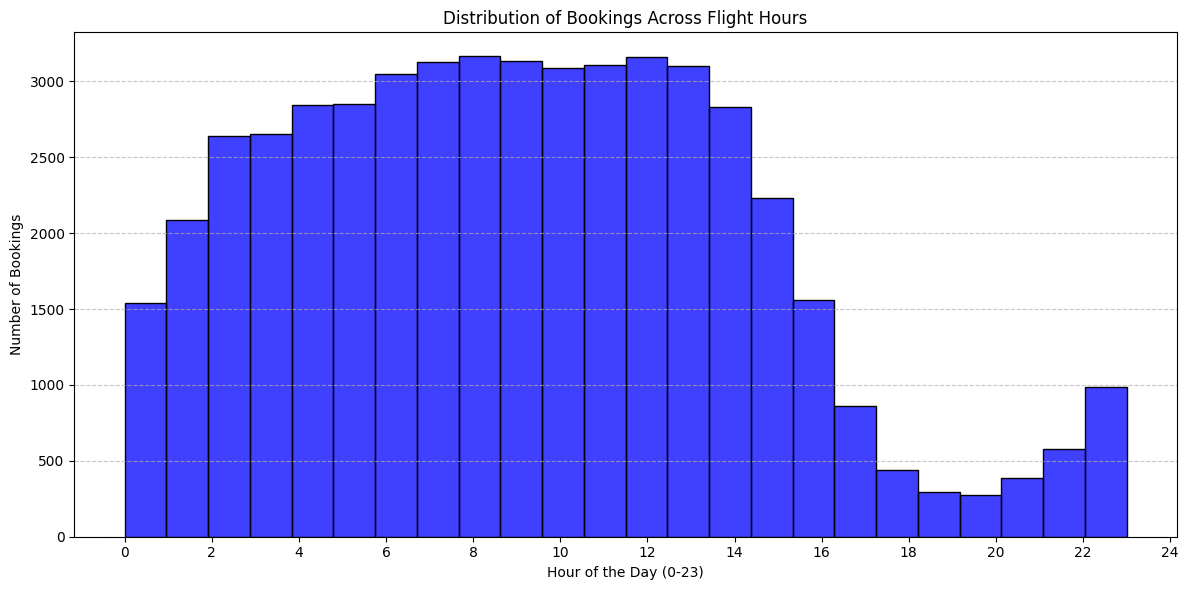


--- Q3: Analysis of Ratings by Traveller Type and Class ---
Loaded 'AirlineScrappedReview_with_Sentiment.csv' for Q3.
Mean Rating by Traveller Type and Class:
Traveller_Type  Class          
Various         Economy Class      1.000000
Solo Leisure    Unknown            1.000000
Business        Economy Class      3.457031
                Business Class     3.510791
Family Leisure  Premium Economy    3.600000
Business        Premium Economy    3.750000
Couple Leisure  Economy Class      3.908297
Unknown         Unknown            4.000000
Family Leisure  Economy Class      4.061069
                First Class        4.230769
Couple Leisure  Premium Economy    4.239583
Business        First Class        4.270270
Solo Leisure    Economy Class      4.631193
Couple Leisure  Business Class     5.332335
Solo Leisure    Premium Economy    5.653061
Unknown         Economy Class      5.740741
Family Leisure  Business Class     5.743902
Solo Leisure    Business Class     5.780347
Unknown         

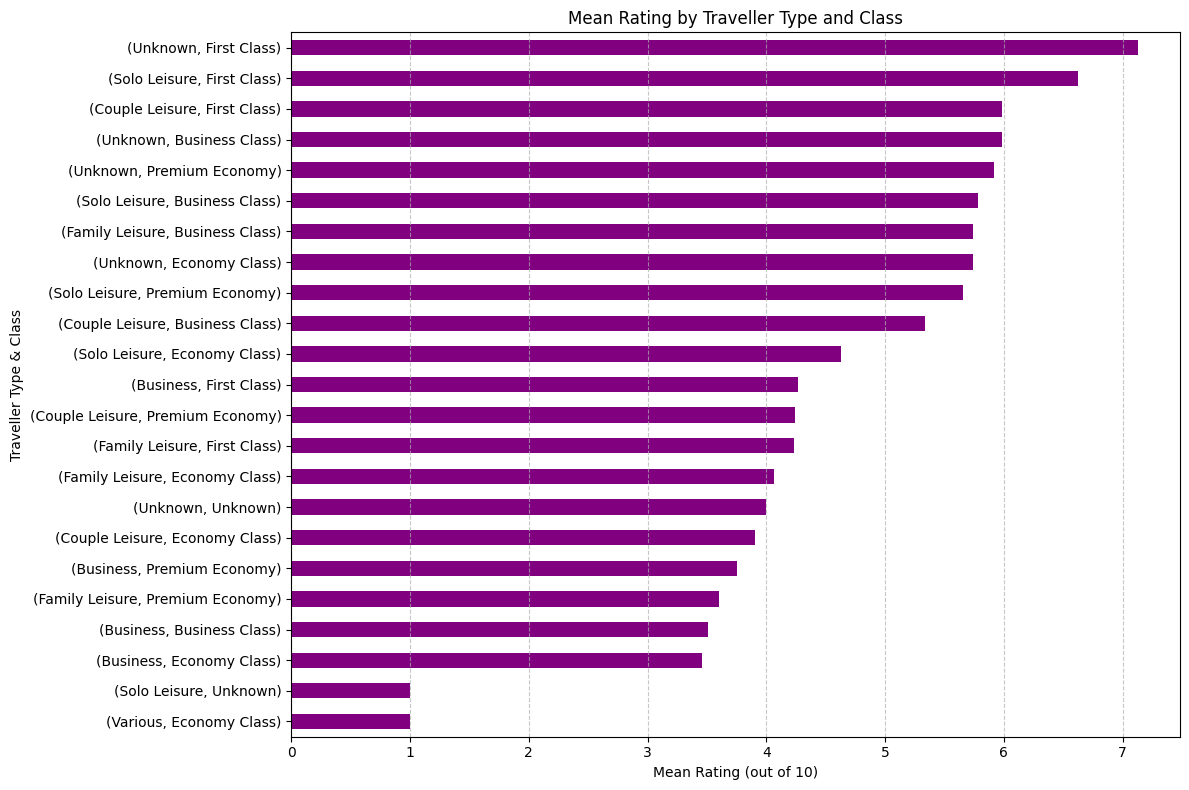

In [302]:
print("\n--- Answering Data-Engineering Questions ---")

try:
    print("Loaded Passanger_booking_data.csv for Q1 & Q2.")

    # --- Q1: What are the top 10 most popular flight routes? ---
    print("\n--- Q1: Top 10 Popular Flight Routes ---")
    top_10_routes = pbd['route'].value_counts().head(10)
    print(top_10_routes)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_10_routes.values, y=top_10_routes.index, palette='viridis')
    plt.title('Top 10 Most Popular Flight Routes')
    plt.xlabel('Number of Bookings')
    plt.ylabel('Route')
    plt.tight_layout()
    plt.savefig('top_10_routes.png')
    print("Saved plot to 'top_10_routes.png'")
    plt.show()

    # --- Q2: What is the distribution of bookings across flight hours? ---
    print("\n--- Q2: Distribution of Bookings by Flight Hour ---")
    plt.figure(figsize=(12, 6))
    sns.histplot(pbd['flight_hour'], bins=24, kde=False, color='blue')
    plt.title('Distribution of Bookings Across Flight Hours')
    plt.xlabel('Hour of the Day (0-23)')
    plt.ylabel('Number of Bookings')
    plt.xticks(range(0, 25, 2))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('booking_hour_distribution.png')
    print("Saved plot to 'booking_hour_distribution.png'")
    plt.show()

except Exception as e:
    print(f"An error occurred while analyzing pbd: {e}")

# --- Q3: Highest and lowest ratings by traveler type and class? ---
# NOTE: This part depends on 'asr' from Block 1
print("\n--- Q3: Analysis of Ratings by Traveller Type and Class ---")
try:
    asr = pd.read_csv('AirlineScrappedReview_with_Sentiment.csv')
    print("Loaded 'AirlineScrappedReview_with_Sentiment.csv' for Q3.")
    if 'asr' in locals() and 'Traveller_Type' in asr.columns:
        # Group by Traveller_type and Class, then calculate mean rating
        rating_analysis = asr.groupby(['Traveller_Type', 'Class'])['Rating'].mean().sort_values()

        print("Mean Rating by Traveller Type and Class:")
        print(rating_analysis)

        print(f"\nLowest Rating Combination:\n{rating_analysis.head(1)}")
        print(f"\nHighest Rating Combination:\n{rating_analysis.tail(1)}")

        plt.figure(figsize=(12, 8))
        rating_analysis.plot(kind='barh', color='purple')
        plt.title('Mean Rating by Traveller Type and Class')
        plt.xlabel('Mean Rating (out of 10)')
        plt.ylabel('Traveller Type & Class')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('ratings_by_type_class.png')
        print("Saved plot to 'ratings_by_type_class.png'")
        plt.show()
    else:
        print("Skipping Q3: 'asr' DataFrame or 'Traveller_type' column not found.")
        print("Please upload 'AirlineScrappedReview_Cleaned.csv' and run Block 1 first.")

except Exception as e:
    print(f"An error occurred while analyzing asr for Q3: {e}")

In [307]:
# --- Block 3: NEW Predictive Model (Objective 3) ---
# NOTE: This block replaces your *entire* existing ML pipeline
# It will not run until the 'asr' DataFrame is created in Block 1

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("\n--- Setting up NEW Binary Classification Model (Objective 3) ---")

try:
    if 'asr' not in locals():
        raise FileNotFoundError("Run Block 1 first to load and process the 'asr' DataFrame.")

    # 1. Define the new Target Variable (y)
    # Satisfied if Rating >= 5, else Dissatisfied (1=Satisfied, 0=Dissatisfied)
    asr['satisfaction'] = asr['Rating'].apply(lambda x: 1 if x >= 5 else 0)
    y = asr['satisfaction']
    print("Created new binary target 'y' (satisfaction).")
    print(y.value_counts())

    # 2. Define the new Features (X)
    # Using features from the project description
    X = asr[['Traveller_Type', 'Class', 'Verified', 'Sentiment_Analysis']].copy()
    print("Defined new features 'X'.")

    # 3. Handle NaNs in X before preprocessing
    # Fill numeric NaNs (e.g., Sentiment_Analysis) with 0
    X['Sentiment_Analysis'] = X['Sentiment_Analysis'].fillna(0)
    # Fill categorical NaNs with 'Unknown'
    X['Traveller_Type'] = X['Traveller_Type'].fillna('Unknown')
    X['Class'] = X['Class'].fillna('Unknown')
    # Assuming NaNs for Verified mean False. Convert to int (0 or 1)
    X['Verified'] = X['Verified'].apply(lambda x: 1 if str(x) == 'Trip Verified' else 0)
    # 4. Define Preprocessing Steps
    numeric_features = ['Sentiment_Analysis']
    categorical_features = ['Traveller_Type', 'Class']
    passthrough_features = ['Verified'] # Already 0/1

    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Create the preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
            ('pass', 'passthrough', passthrough_features)
        ])

    # 5. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 6. Create the Logistic Regression Pipeline (Statistical ML Baseline)
    lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression())])

    # 7. Train the model
    print("Training Logistic Regression model...")
    lr_pipeline.fit(X_train, y_train)

    # 8. Evaluate the model
    y_pred = lr_pipeline.predict(X_test)

    print("\n--- Logistic Regression (Binary Model) Results ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Dissatisfied (0)', 'Satisfied (1)']))

except FileNotFoundError:
    print("Skipping Model (Block 3): 'asr' DataFrame not loaded (Run Block 1 first).")
except Exception as e:
    print(f"An error occurred during model setup (Block 3): {e}")


--- Setting up NEW Binary Classification Model (Objective 3) ---
Created new binary target 'y' (satisfaction).
satisfaction
0    1856
1    1719
Name: count, dtype: int64
Defined new features 'X'.
Training Logistic Regression model...

--- Logistic Regression (Binary Model) Results ---
Accuracy: 0.7930
Precision: 0.7500
Recall: 0.8432
F1-Score: 0.7939

Classification Report:
                  precision    recall  f1-score   support

Dissatisfied (0)       0.84      0.75      0.79       377
   Satisfied (1)       0.75      0.84      0.79       338

        accuracy                           0.79       715
       macro avg       0.80      0.80      0.79       715
    weighted avg       0.80      0.79      0.79       715




--- Setting up NEW XAI and Inference Function ---
Setting up SHAP Explainer...
Plotting SHAP Global Explanation (Deliverable 5)...
Saved 'binary_model_shap_summary.png'


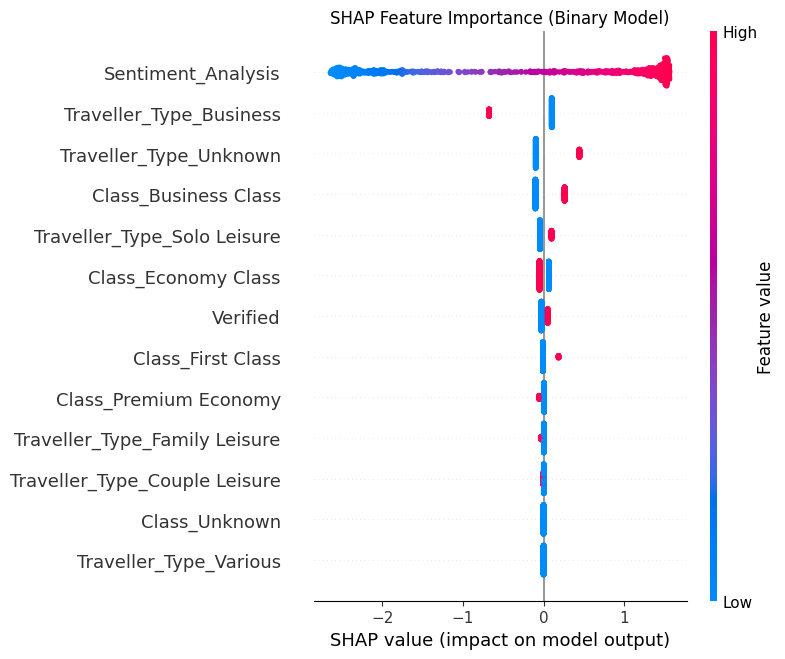


Defining Inference Function...

--- Inference Function Demonstration ---
Input: {'Traveller_Type': 'Solo', 'Class': 'Economy', 'Verified': True, 'Sentiment_Analysis': 0.75}
Prediction: Satisfied (Confidence: 72.54%)

Input: {'Traveller_Type': 'Family', 'Class': 'Business', 'Verified': False, 'Sentiment_Analysis': -0.5}
Prediction: Dissatisfied (Confidence: 85.22%)


In [309]:
# --- Block 4: NEW XAI and Inference Function (Objectives 4 & 6) ---
# NOTE: This block depends on the 'lr_pipeline' and 'preprocessor' from Block 3

import shap
import pandas as pd

print("\n--- Setting up NEW XAI and Inference Function ---")

try:
    if 'lr_pipeline' not in locals():
        raise NameError("Run Block 3 first to train 'lr_pipeline'.")

    # --- 4. Model Explainability (SHAP) ---
    print("Setting up SHAP Explainer...")

    # 1. Get the fitted classifier and preprocessor
    model_clf = lr_pipeline.named_steps['classifier']
    model_preprocessor = lr_pipeline.named_steps['preprocessor']

    # 2. Transform the training data to get the feature names
    X_train_transformed = model_preprocessor.transform(X_train)

    # Get all feature names from the preprocessor for the SHAP plot
    try:
        ohe_feature_names = model_preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
    except AttributeError: # for older sklearn versions
        ohe_feature_names = model_preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features)

    all_feature_names = numeric_features + list(ohe_feature_names) + passthrough_features

    # Convert sparse matrix to dense array for SHAP
    X_train_transformed_dense = X_train_transformed
    # 3. Create SHAP Explainer
    # We use a Linear explainer: fast and perfect for Logistic Regression
    explainer = shap.LinearExplainer(model_clf, X_train_transformed_dense)

    # 4. Calculate SHAP values for the test set
    X_test_transformed = model_preprocessor.transform(X_test)
    shap_values = explainer.shap_values(X_test_transformed)

    print("Plotting SHAP Global Explanation (Deliverable 5)...")
    shap.summary_plot(shap_values, X_test_transformed, feature_names=all_feature_names, show=False)
    plt.title("SHAP Feature Importance (Binary Model)")
    plt.tight_layout()
    plt.savefig('binary_model_shap_summary.png')
    print("Saved 'binary_model_shap_summary.png'")
    plt.show()

    # --- 6. Inference Function (Deliverable 6) ---
    print("\nDefining Inference Function...")

    def predict_satisfaction_inference(raw_input_dict):
        """
        Takes a single raw input as a dictionary,
        pre-processes it using the fitted pipeline,
        and returns a natural language prediction.
        """
        # Convert dict to DataFrame
        raw_df = pd.DataFrame([raw_input_dict])

        # Get prediction (0 or 1)
        prediction = lr_pipeline.predict(raw_df)[0]

        # Get probability
        probability = lr_pipeline.predict_proba(raw_df)[0]

        # Return natural language output
        if prediction == 1:
            return f"Prediction: Satisfied (Confidence: {probability[1]:.2%})"
        else:
            return f"Prediction: Dissatisfied (Confidence: {probability[0]:.2%})"

    # --- Demonstrate the Inference Function ---
    print("\n--- Inference Function Demonstration ---")
    example_input = {
        'Traveller_Type': 'Solo',
        'Class': 'Economy',
        'Verified': True,
        'Sentiment_Analysis': 0.75 # A positive sentiment
    }

    prediction_text = predict_satisfaction_inference(example_input)
    print(f"Input: {example_input}")
    print(f"{prediction_text}")

    example_input_2 = {
        'Traveller_Type': 'Family',
        'Class': 'Business',
        'Verified': False,
        'Sentiment_Analysis': -0.5 # A negative sentiment
    }

    prediction_text_2 = predict_satisfaction_inference(example_input_2)
    print(f"\nInput: {example_input_2}")
    print(f"{prediction_text_2}")

except NameError:
    print("Skipping XAI/Inference (Block 4): 'lr_pipeline' not trained (Run Block 3 first).")
except Exception as e:
    print(f"An error occurred during XAI/Inference setup (Block 4): {e}")